# ___Song Popularity Analysis & Prediction___

## Background and Motivation

The world of music has captivated humanity for centuries, serving as a source of comfort, inspiration, and expression. From Beethoven's soaring symphonies to Beyonce's pulsating rhythms, each song is a story with a unique ability to stir emotions and resonate with listeners from all around the world. My personal journey with music started more than a decade ago, when I asked for a digital piano as a birthday gift. Ever since then, I've been entranced by this world of melodies, and I'm constantly exploring new genres and artists.

In recent years, the sky-rocketing popularity of streaming services has reshaped the music industry, revolutionizing the way we consume and share music. Today, more than ever, a song is just as much a commodity as it is an artform. As technology continues to redefine the landscape of the music industry, there is an increasing demand for insights into the elusive phenomenon of song.

As a computer science major, the idea of exploring the intricate relationship between music and data through code was irresistible.  With hundreds of new songs being released regularly across various genres, understanding the factors that contribute to the popularity of a song is crucial for artists, record labels, and streaming platforms to make informed business decisions. On a personal level, I'm extremely curious to see how different audio features can influence popularity, and whether or not the plots I'll create will challenge some of my preconceived notions about what determines commercial success.

Consequently, I aim to investigate whether it is possible to predict the popularity of a song based on its audio features and metadata through this project. The questions I hope to answer are: **Given a dataset of song features and metadata, to what extent can we train a machine learning model to predict the popularity of a song? Which audio features have the most significant impact on predicting song popularity?**

## Methodology and Results

### Loading And Cleaning Data ##

Dataset:

https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/code

In [1]:
#Importing necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import skew
%matplotlib inline  
from sklearn.model_selection import train_test_split
import sklearn.linear_model 
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('dataset.csv')
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


This is data frame with 114,000 observations and 21 variables. It's worth noting that we have 15 numeric columns, 5 character columns, and one binary column. Column descriptions:
- **track_id**: The Spotify ID for the track
- **artists**: The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- **album_name**: The album name in which the track appears
- **track_name**: Name of the track
- **popularity**: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms**: The track length in milliseconds
- **explicit**: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
- **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- **loudness**: The overall loudness of a track in decibels (dB)
- **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **track_genre**: The genre in which the track belongs

We can get rid of the column entitled 'Unnamed', as it serves no relevant purpose.

In [3]:
# Deleting the first columns in the data frame 
data.drop(data.columns[0], axis=1, inplace=True)
# Verifying that deletion was successful
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Before proceeding, I checked for null or blank values in this dataframe.

In [4]:
# Check for null values
null_values = data.isnull().sum()
# Display columns with null values
print("Columns with null values:")
print(null_values[null_values > 0])
print()
data.replace('', np.nan, inplace=True)
# Check for blank values
blank_values = data.isnull().sum()
# Display columns with blank values
print("Columns with blank values:")
print(blank_values[blank_values > 0])

Columns with null values:
artists       1
album_name    1
track_name    1
dtype: int64

Columns with blank values:
artists       1
album_name    1
track_name    1
dtype: int64


Each of these columns contains 1 blank or null entry. Before I deleted all rows with empty entries, I wanted to check whether they coincide.

In [5]:
# Find rows where blank and null values coincide
coincide_rows = []
for index, row in data.iterrows():
    if row.isnull().sum() > 0 and row.isnull().sum() == row.isna().sum():
        coincide_rows.append(index)

# Display rows where blank and null values coincide
print("Rows where blank and null values coincide:")
print(data.loc[coincide_rows])

Rows where blank and null values coincide:
                     track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop  


Row 65,900 contains empty values and therefore must be removed.

In [6]:
data = data.dropna()

In [7]:
data.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Duplicate values must also be deleted.

In [8]:
data=data.drop_duplicates()
data.shape

(113549, 20)

An overview of the data:

In [9]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113549.000000,1.135490e+05,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,33.324433,2.280814e+05,0.567031,0.642091,5.309452,-8.243408,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218
std,22.283855,1.064131e+05,0.173409,0.251053,3.560147,5.011422,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741840e+05,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.615880e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


### Exploratory Data Analysis (EDA)

Through visualizations and statistical analyses, I aim to gain a deeper understanding of the data's distribution, explore relationships between variables, and identify potential preprocessing steps for my modeling journey.

Out of the 20 columns in this dataset, the one I'm most interested in is popularity. First, let's observe the distribution of popularity scores.

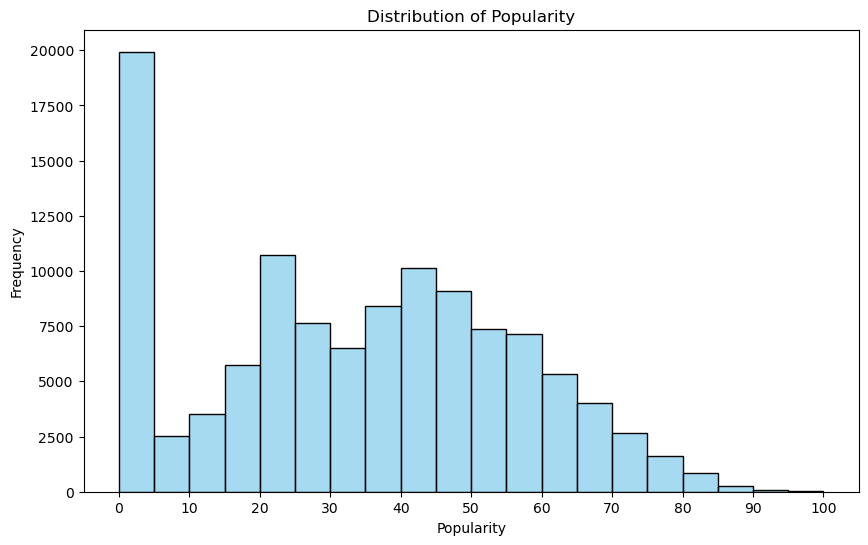

In [10]:
# Plotting the distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity')
plt.xticks(range(0, 101, 10))
plt.show()

Songs with very low popularity are numerous, and almost the majority have zero popularity. This goes to show just how elusive success in the music industry can be as well as why record labels are eager to demystify the formula for creating a hit song. We're not dealing with normally distributed or logarithmic data, which can pose some issues. Let's take a look at other parameters.

In [11]:
feature_numerical = [feature for feature in data.columns if feature != 'popularity' and data[feature].dtype != 'O']
print('Number of numerical columns=', len(feature_numerical))
data[feature_numerical].head()

Number of numerical columns= 14


,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


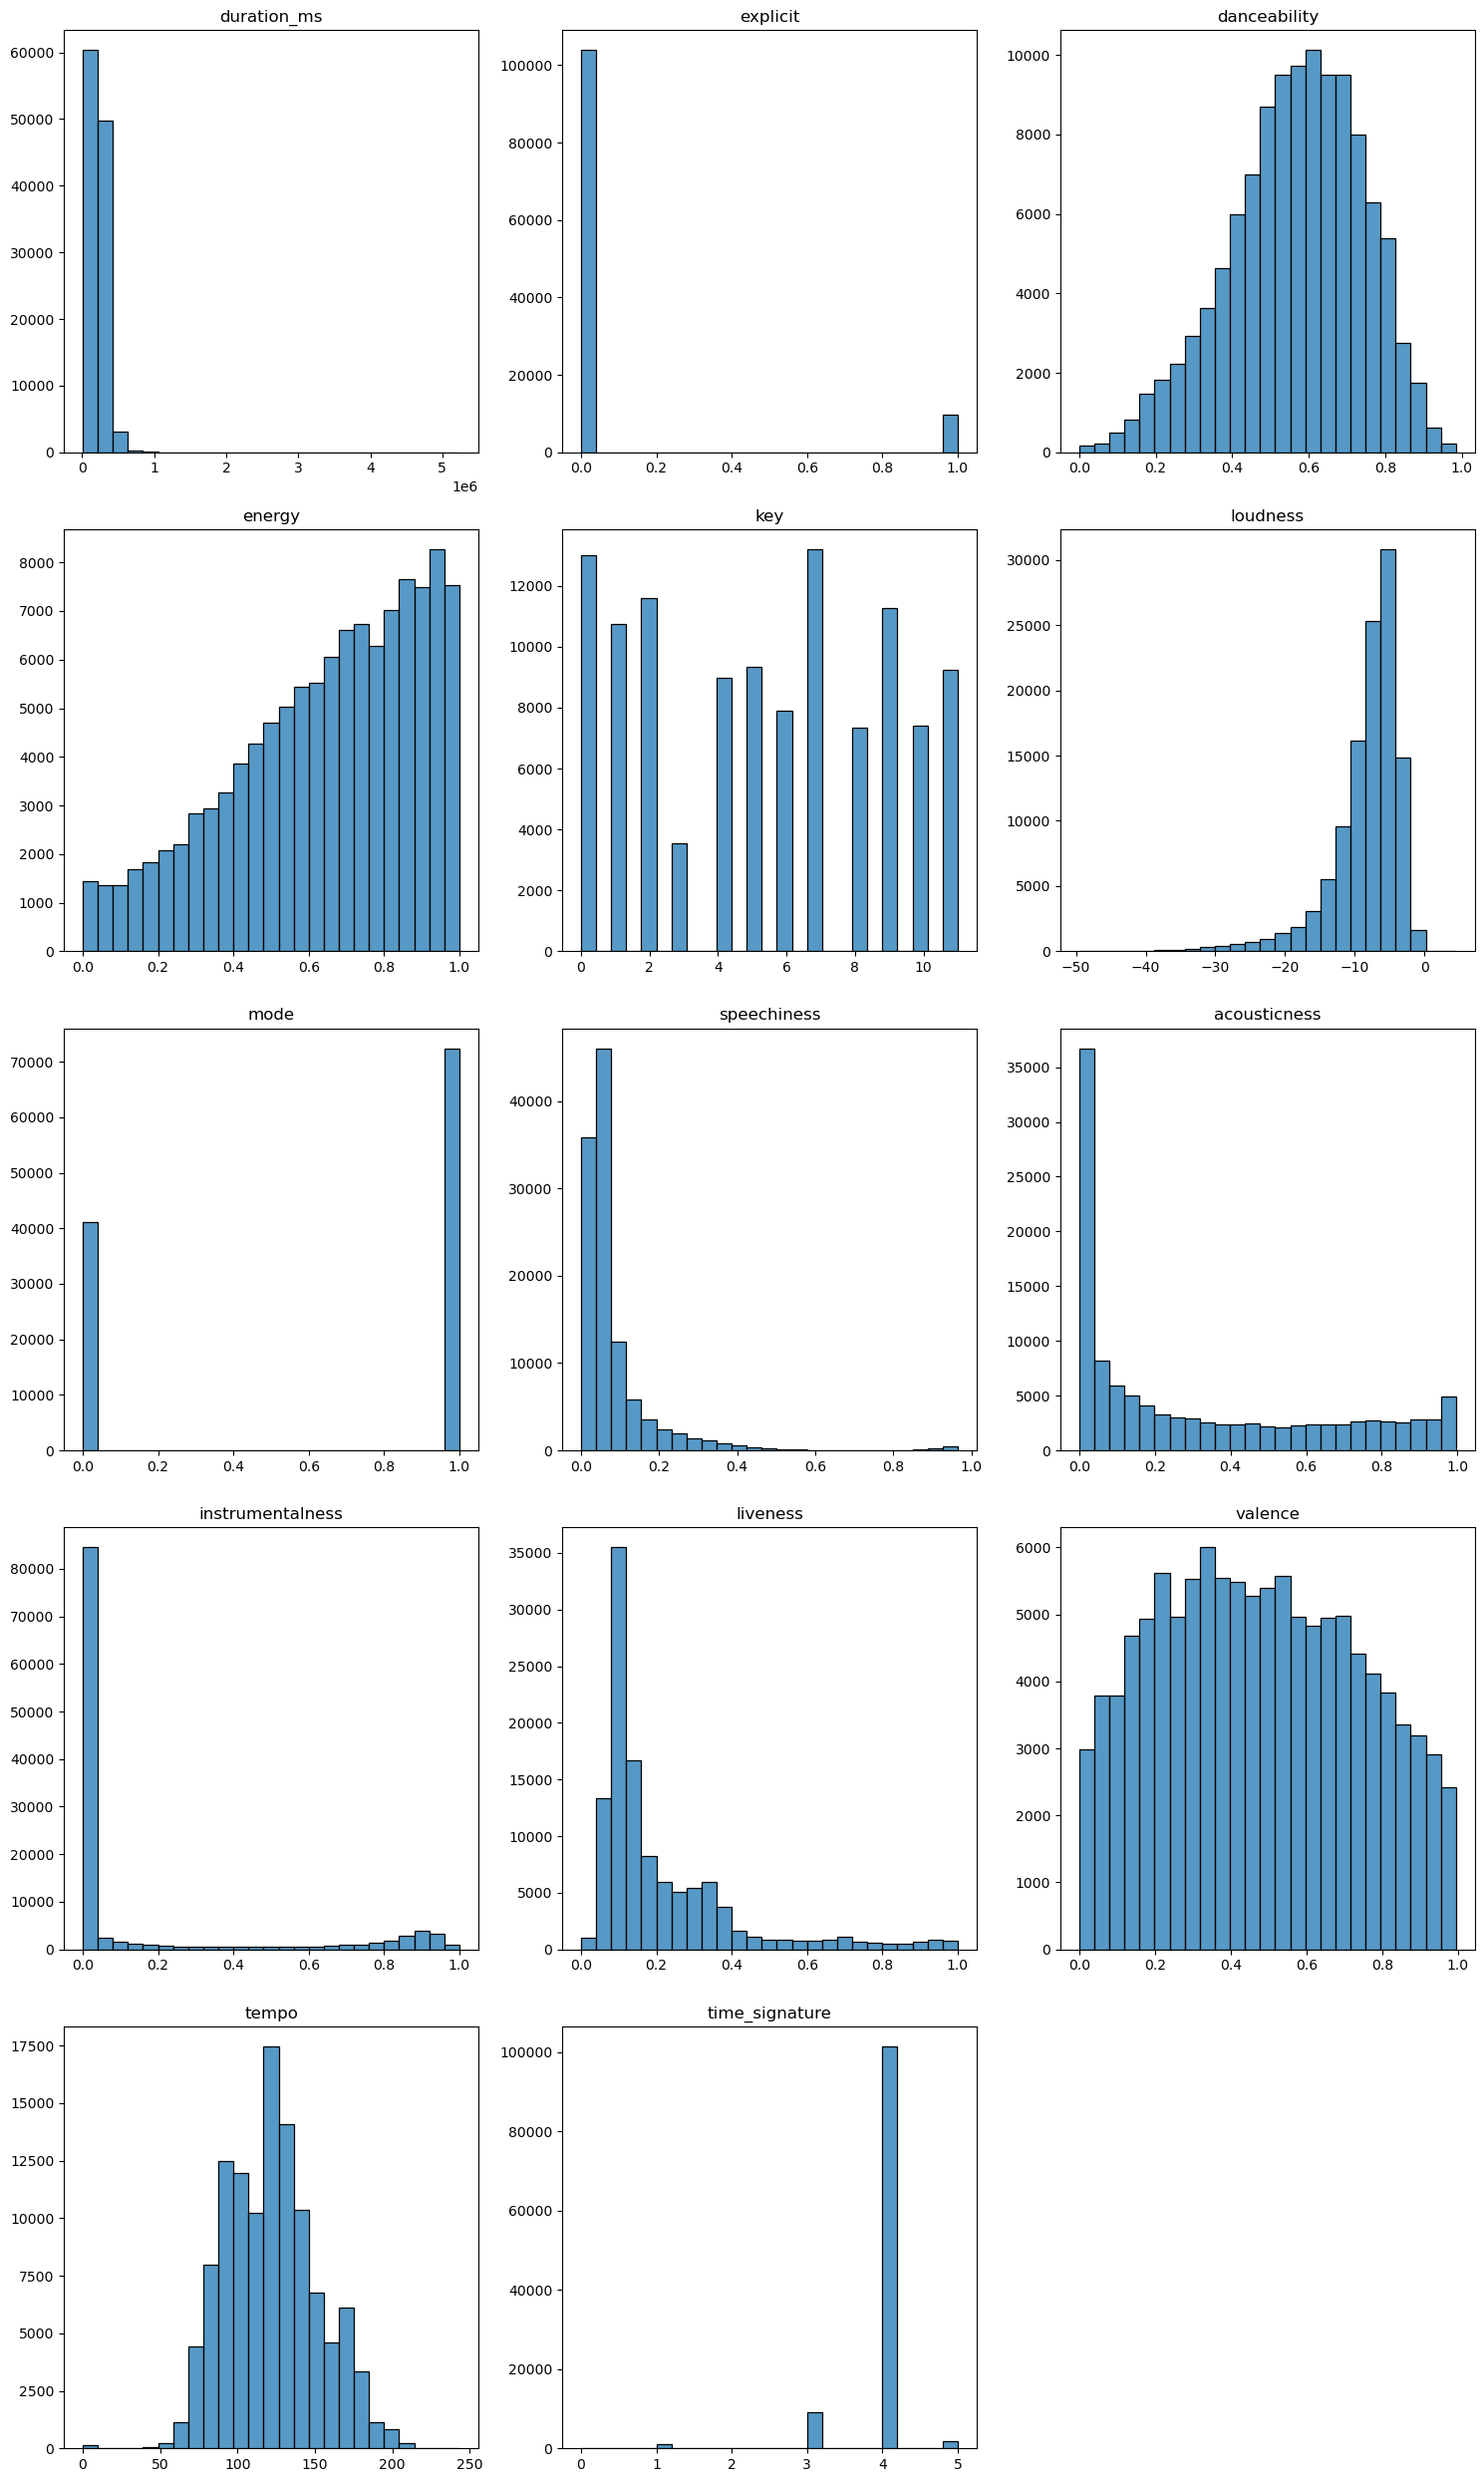

In [12]:
num_features = len(feature_numerical)
num_rows = (num_features + 2) // 3  

# Create subplots
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

axs = axs.flatten()

# Loop through each feature
for i, feature in enumerate(feature_numerical):
    sns.histplot(x=feature, data=data, bins=25, ax=axs[i])
    axs[i].set_title(feature)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')

# Hide any extra subplots
for j in range(i + 1, num_rows * 3):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

The distributions for danceability, energy, volume, liveness, valence, and tempo, are not normal, but it doesn't seem like they will cause issues with high correlation. On the other hand, we might encounter this problem with duration, speechiness, acousticness, and instrumentalness. Let's see if there's a way to address this issue.

For example, with duration, we can see from the histogram that the variable seems to have a log-normal distribution. Taking the logarithm of the duration can help in normalizing the distribution, especially when dealing with wide-ranging values. Normalizing it afterward will ensure that the values are scaled within a range that is more conducive to analysis. Therefore, we will take the logarithm and normalize it:

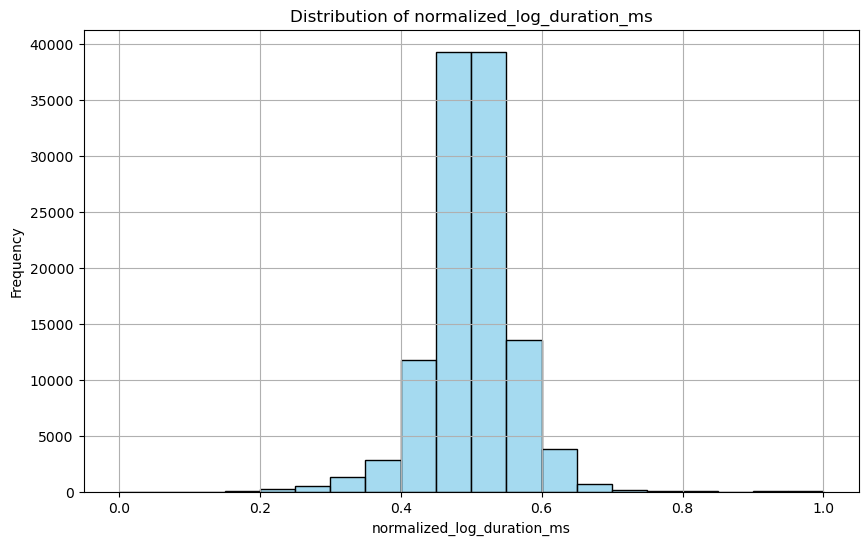

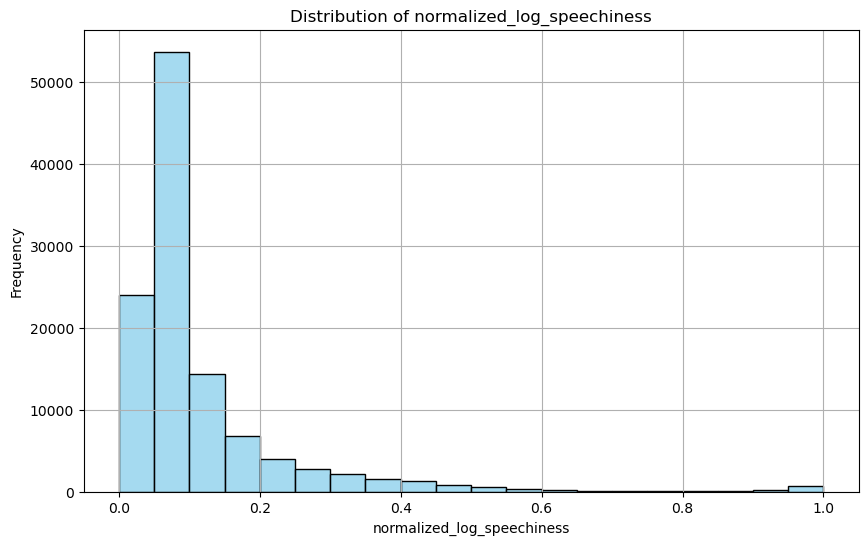

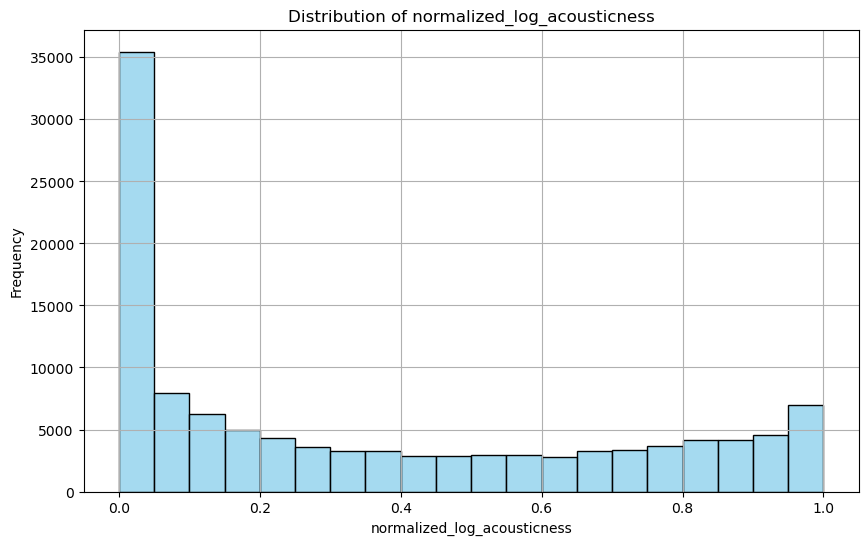

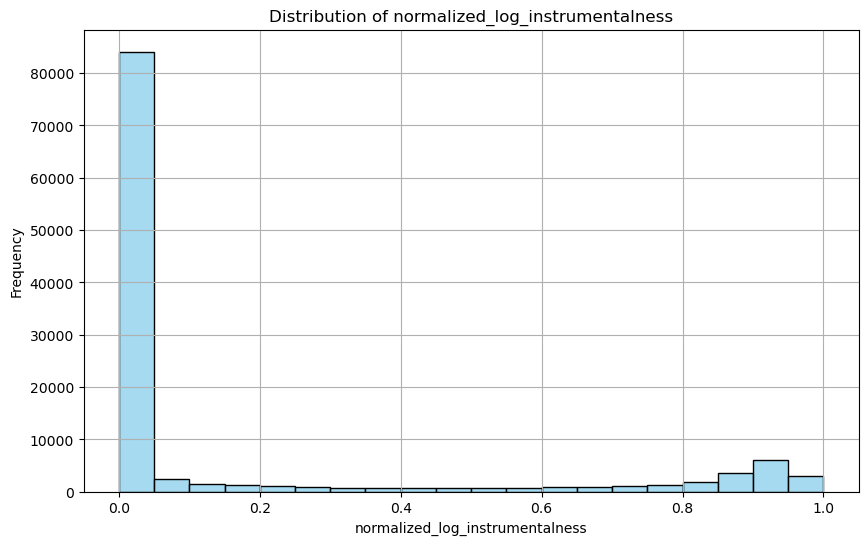

In [13]:
def normalize_log_plot(data, param):
    """
    Normalize a specified parameter in the given data and plot its distribution after taking the logarithm.

    Parameters:
    - data (DataFrame): The dataset containing the parameter to be normalized.
    - param (str): The name of the parameter to be normalized.

    Returns:
    - None
    """
    
    # Construct the name for the logarithm of the parameter
    log_param = 'log_' + param
    # Take the natural logarithm of the specified parameter and add 1 to avoid log(0)
    data[log_param] = np.log(data[param] + 1)
    # Construct the name for the normalized logarithm of the parameter
    norm_param = 'normalized_' + log_param
    # Normalize the logarithm of the parameter
    data[norm_param] = (data[log_param] - data[log_param].min()) / (data[log_param].max() - data[log_param].min())
    
    # Plot the distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data[norm_param], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(f'{norm_param}')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {norm_param}')
    plt.grid(True)
    plt.show()
    
normalize_log_plot(data, 'duration_ms')
normalize_log_plot(data, 'speechiness')
normalize_log_plot(data, 'acousticness')
normalize_log_plot(data, 'instrumentalness')

Speechiness represents the presence of spoken words in a track, where higher values indicate more speech-like characteristics (such as rap music or spoken-word albums). Understandably, the distribution of speechiness is typically skewed because most songs contain predominantly musical elements rather than spoken words. Even after applying a logarithmic transformation and normalization, the distribution still does not resemble a normal distribution due to the inherent skewness in the original data. The transformation and normalization process does not fully address this skewness.

Acousticness measures the acoustic nature of a track, with higher values indicating a higher likelihood of the track being acoustic. Similar to speechiness, the distribution of acousticness is often skewed because the majority of tracks are not purely acoustic, with the exception of folk, jazz, and orchestral music, as well as their subgenres. Most songs are a combination of acoustic and electronic instruments. Despite the transformation and normalization, the distribution remains skewed because the underlying data distribution is inherently skewed towards non-acoustic tracks.

Instrumentalness quantifies the absence of vocals in a track, with higher values indicating instrumental tracks. Again, the distribution of instrumentalness tends to be skewed due to the dominance of vocal-containing tracks in the dataset. The logarithmic transformation and normalization does not fully address the skewness, especially if there are extreme outliers in the data.

I can now remove the original four variables (and their logarithmic versions) as I don't have any further use for them.

In [14]:
data = data.drop(['duration_ms', 'log_duration_ms', 'speechiness', 'log_speechiness', 
                  'acousticness', 'log_acousticness', 'instrumentalness', 'log_instrumentalness'], axis=1)

feature_numerical = [feature for feature in data.columns if feature != 'popularity' and data[feature].dtype != 'O']
print('Number of numerical columns=', len(feature_numerical))
data[feature_numerical].head()

Number of numerical columns= 14


,explicit,danceability,energy,key,loudness,mode,liveness,valence,tempo,time_signature,normalized_log_duration_ms,normalized_log_speechiness,normalized_log_acousticness,normalized_log_instrumentalness
0,False,0.676,0.4610,1,-6.746,0,0.3580,0.715,87.917,4,0.513109,0.197865,0.045855,0.000001
1,False,0.420,0.1660,1,-17.235,1,0.1010,0.267,77.489,4,0.445603,0.108853,0.946844,0.000008
2,False,0.438,0.3590,0,-9.734,1,0.1170,0.120,76.332,4,0.499085,0.080244,0.275804,0.000000
3,False,0.266,0.0596,0,-18.515,1,0.1320,0.143,181.740,3,0.492365,0.052786,0.932484,0.000102
4,False,0.618,0.4430,2,-9.681,1,0.0829,0.167,119.949,4,0.489969,0.075890,0.556442,0.000000


To begin understanding what influences a song's popularity, let's take a look at interrelationships between various audio features and the popularity of songs. 

In [15]:
selected_columns = data[['popularity', 'normalized_log_duration_ms', 'danceability', 'energy', 'loudness', 
                         'normalized_log_speechiness', 'normalized_log_acousticness', 
                         'normalized_log_instrumentalness', 'liveness', 'valence', 'tempo']]

# Compute correlation matrix
correlation_matrix = selected_columns.corr()

I've selected a subset of audio features alongside our target variable - popularity - to compute the correlation matrix of these selected feature. I'm hoping to gain insights into how each feature correlates with the popularity of songs. The correlation values, represented in a heatmap, will provide a visual understanding of the degree and direction of these relationships, aiding in the identification of potentially influential factors in determining song popularity.

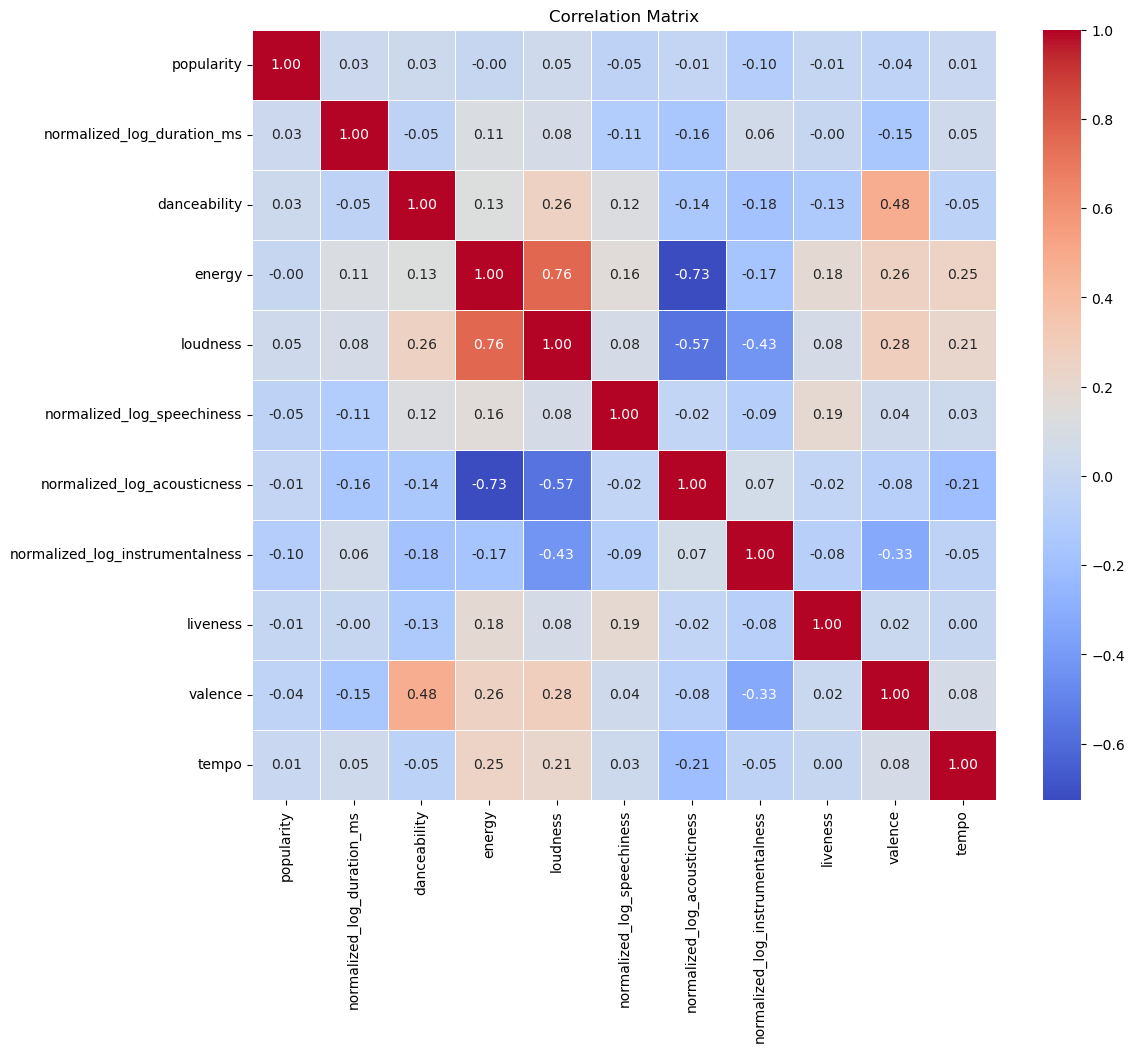

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We can start demystifying how specific musical attributes influence a track's popularity.

Starting with danceability (0.03), we observe a slight positive correlation with popularity. This suggests that tracks with higher tempo (upbeat songs) and stable rhythms are marginally more likely to be popular among listeners. This is backed by tempo's slight positive correlation with popularity (0.01). Interestingly, we find no significant correlation between popularity and energy (0.0), implying that a song's energy level does not strongly influence its overall popularity. I was expecting a weak positive correlation at the very least, given the coefficients for danceability and tempo (0.01).

The loudness coefficient (0.05) also indicates a modest positive correlation with popularity, implying that louder tracks tend to be slightly more popular. Conversely, speechiness (-0.05) exhibits a negative correlation with popularity, suggesting that tracks with more speech-like elements may be less favored by listeners.

The acousticness coefficient (-0.02) suggests a slight negative correlation with popularity. Tracks with higher acoustic elements may be slightly less popular. Similarly, instrumentalness (-0.09) exhibits a more pronounced negative correlation with popularity, indicating that tracks with fewer vocal elements are generally less popular among listeners.

Liveness (-0.01) shows a negligible negative correlation with popularity, suggesting that the presence of live recordings may not significantly impact a track's popularity. Lastly, valence (-0.04) displays a modest negative correlation with popularity, indicating that tracks with lower valence scores, conveying more negative emotions, may be slightly less popular overall.

#### Exploring Categorical Data

Now that we've started to gain an idea of how some numerical non-categorical audio features' relationship with popularity, I want to explore the relationship between categorical variables and popularity.

##### Numerical Categorical Data

In [17]:
# Selecting out the discrete features among the numerical features 
# and finding their relationship with popularity
feature_discrete_numerical=[feature for feature in feature_numerical if data[feature].nunique()<50 and feature!='duration_ms']
feature_discrete_numerical
feature_numerical

['explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'normalized_log_duration_ms',
 'normalized_log_speechiness',
 'normalized_log_acousticness',
 'normalized_log_instrumentalness']

Keys are represeted as integers in the dataset, so I created a dictionary of integers and the music note they map to. I've done the same for time signatures.

In [18]:
keys_dict = {-1: 'no key', 
             0:'C', 
             1:'C#', 
             2:'D', 
             3:'D#', 
             4:'E' , 
             5:'F', 
             6:'F#', 
             7:'G', 
             8:'G#', 
             9:'A', 
             10:'A#', 
             11:'B'}

time_sig = {0:'0/0',
           1:'3/4',
           2:'4/4',
           3:'5/4',
           4:'6/4',
           5:'7/4'}

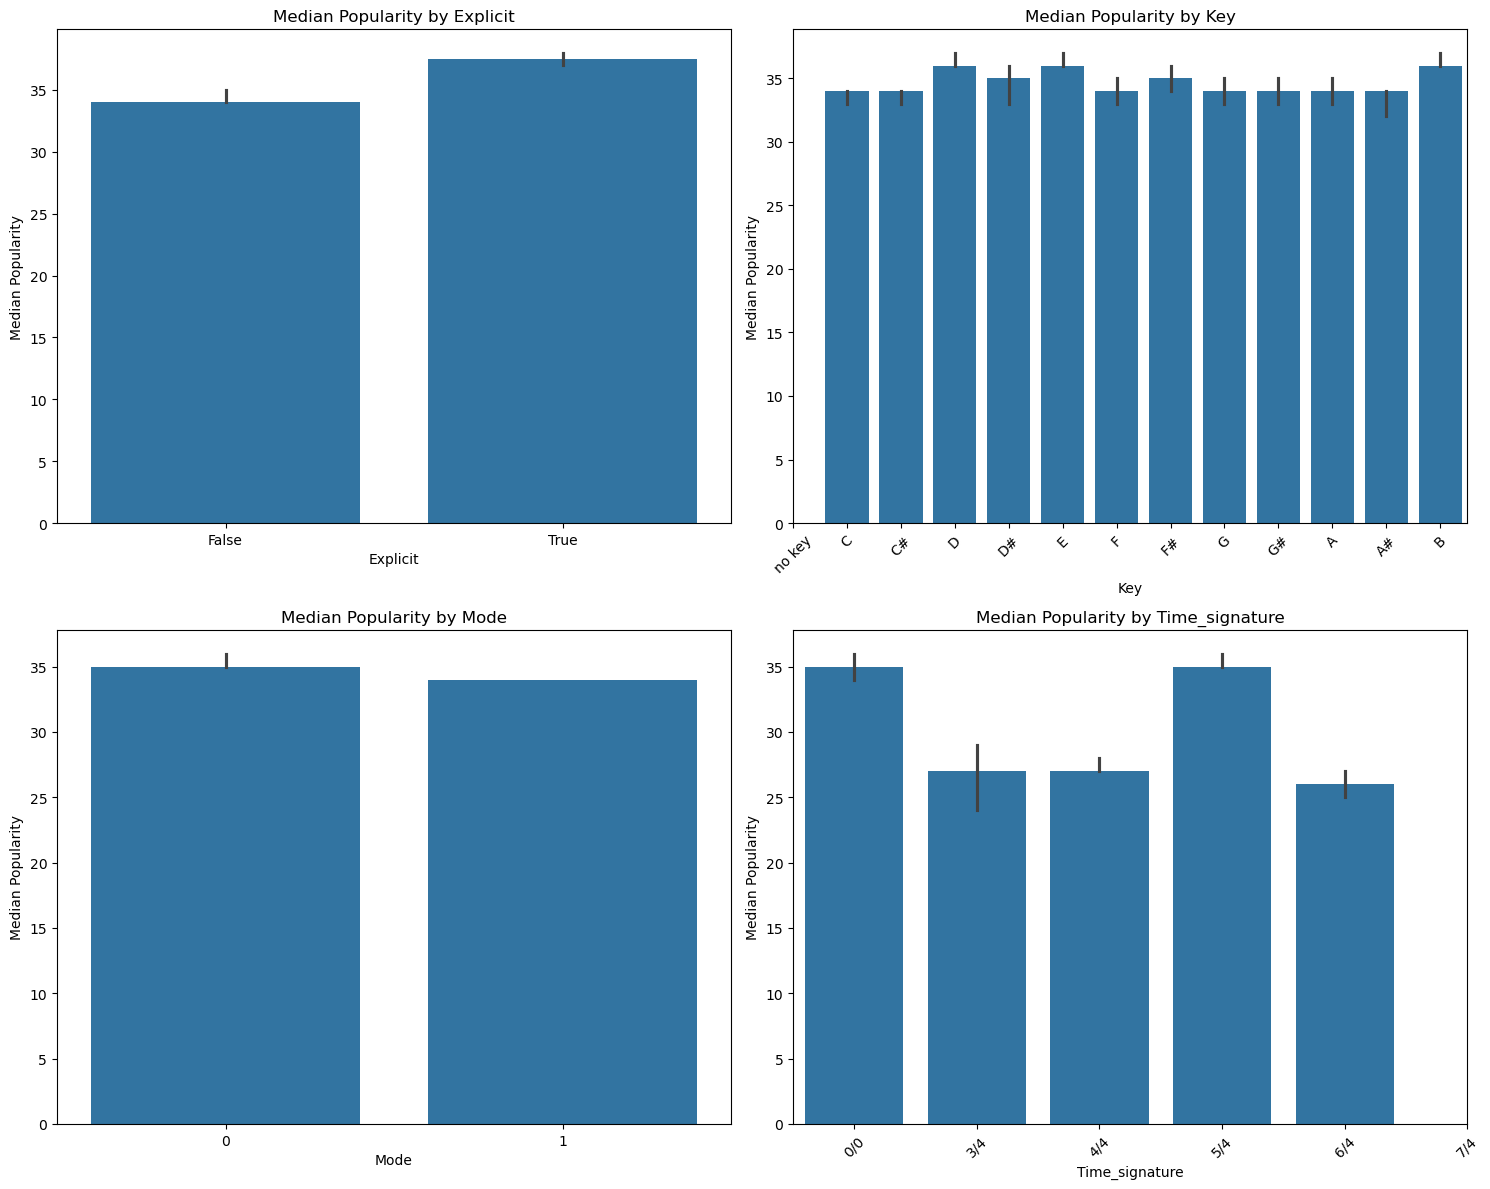

In [19]:
num_features = len(feature_discrete_numerical)
num_cols = 2  
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6*num_rows))

for i, feature in enumerate(feature_discrete_numerical):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    sns.barplot(x=feature, y='popularity', data=data, estimator=np.median, ax=ax)
    ax.set_xlabel(feature.capitalize())  
    ax.set_ylabel('Median Popularity')  
    ax.set_title(f'Median Popularity by {feature.capitalize()}')  
    
    if feature.lower() == 'key':
        tick_positions = sorted(keys_dict.keys())
        ax.set_xticks(tick_positions)
        # Set x-axis labels to musical keys
        ax.set_xticklabels([keys_dict[key] for key in tick_positions], rotation=45)
        ax.tick_params(axis='x', labelrotation=45)  
        
    if feature.lower() == 'time_signature':
        tick_positions = sorted(time_sig.keys())
        ax.set_xticks(tick_positions)
        # Set x-axis labels to musical keys
        ax.set_xticklabels([time_sig[key] for key in tick_positions], rotation=45)
        ax.tick_params(axis='x', labelrotation=45) 
        

plt.tight_layout() 
plt.show()

We observe that songs which contain explicit lyrics are generally more popular than songs that do not contain such lyrics. The popularity of tracks in different keys do not affect their popularity much, but songs in D, E, and B tend to be more popular. The tracks in both the modes have similar median popularity. This surprised me because we observed valence (the 'hapiness' scale of a song) to be negatively correlated to popularity, suggesting that sad, slow songs tend to be slightly unpopular overall. Music theorists universally agree that postive songs are usually written in a major scale (mode = 1), whilst songs with negative emotions are generally written in a minor scale (mode = 0). As a result, I exptected the median popularity of mode = 1 to be noticeably higher, but I was proven wrong.

The time signature (meter) is a notational convention to specify how many beats are in each bar. From the current looks, this is the variable whose frequencies which puzzle me the most. Tracks having time_signature 0 and 5/4 are noticeably more popular than other. However, 4/4 is the most used time signature in music in my experience, so this is quiet shocking. I'm intrigued by time signature of 0 being so popular, as this time signature refers to free-form songs which don't stick to one rhythm. These tracks tend to be more experimental, hence more niche as well. I'm unsure if the popularity of 0 is due to errors in the dataset, or free-form songs being more popular. I'm going to assume the latter as the dataset's creator has not provided much context for the time_signature column.

##### Non-Numerical Categorical Data

I've explored all numeric columns in the dataset so far. Now, it's time to take a look at textual categorical data.

In [20]:
feature_categorical=[feature for feature in data.columns if data[feature].dtypes=='O']
print('Number of categorical features:', len(feature_categorical))
data[feature_categorical].head()

Number of categorical features: 5


,track_id,artists,album_name,track_name,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,acoustic


In [21]:
feature_categorical

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

Among the categorical features, track_id would be unique for each entry. Later we can drop this column. Lets check the cardinality of the categorical features to know the number of unique variables.

In [22]:
for feature in feature_categorical:
    dataset=data.copy()
    print(feature, ': Number of unique entries:', dataset[feature].nunique())

track_id : Number of unique entries: 89740
artists : Number of unique entries: 31437
album_name : Number of unique entries: 46589
track_name : Number of unique entries: 73608
track_genre : Number of unique entries: 114


There are a lot of unique entries in each of the categorical features. Most of the categorical features are names like track name, album name, artist name, etc. track_id is unique for every song/track.

In real life, we know that an artist's popularity can significantly influence the popularity of a track. For instance, it's almost certain that tracks released by mainstream populat artists with tens of millions of monthly listeners on Spotify will receive far more streams than tracks released by smaller, independent artists. This isn't always guaranteed: indie artists often find groundbreaking fame through factors that this dataset doesn't consider, such as virality on social media. However, for the sake of not over-complicating this project, I will not consider string data from track_id, artists, album_name, track_name, and track_genre. 

Before dropping these columns, I want to visualize just how much of a difference categorical data from these columns can make on a song's popularity. The plot below visualizes the relationship between song genres and their average popularity scores.

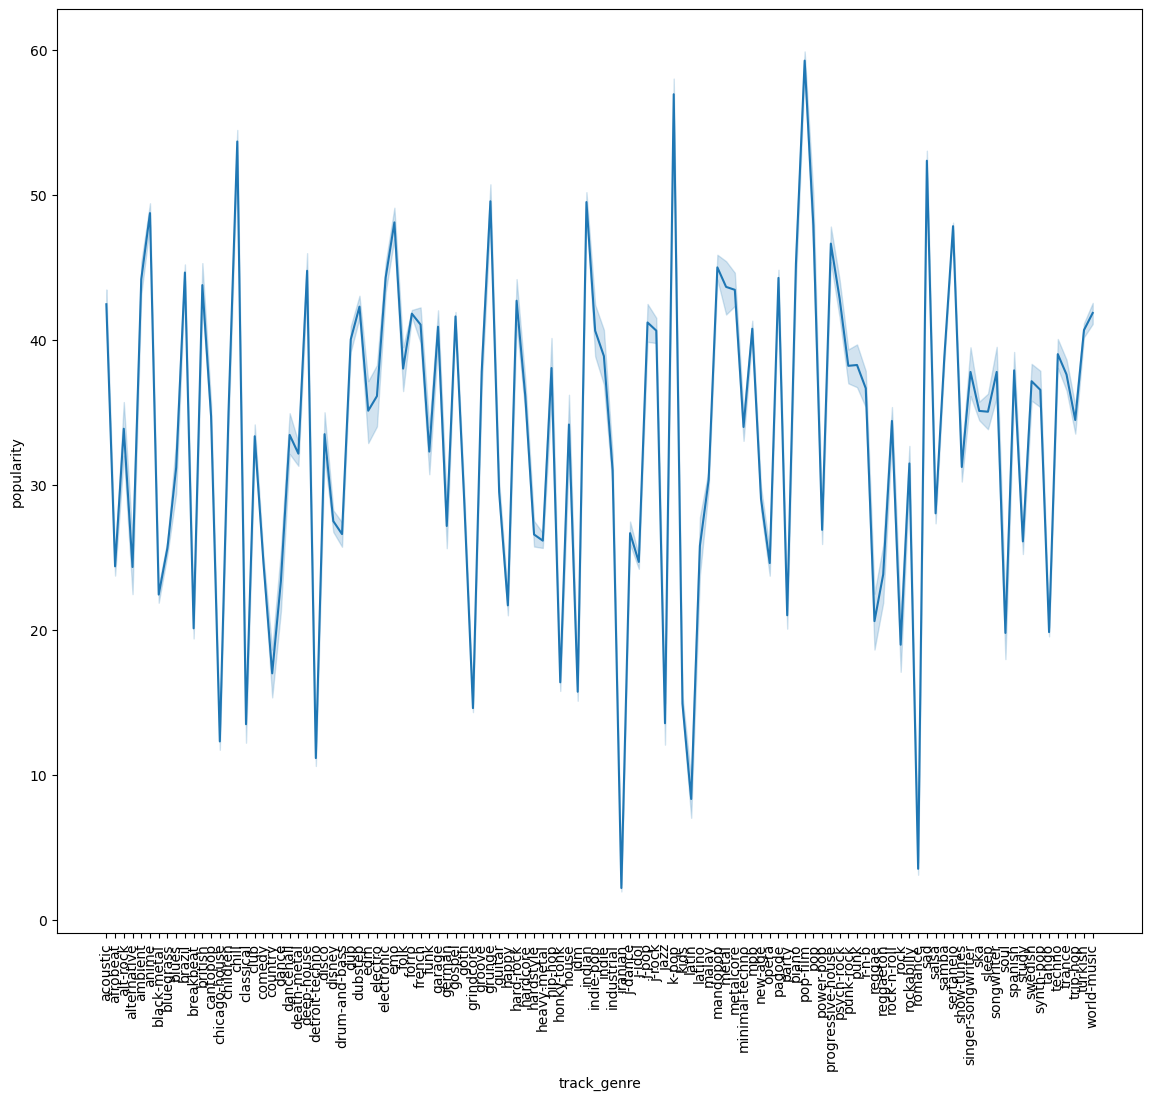

In [23]:
dataset=data.copy()
plt.figure(figsize=(14,12))
sns.lineplot(x='track_genre', y='popularity', data=dataset)
plt.xticks(rotation=90)
plt.show()

The exact values of each genre are not of interest, so we don't need to understand their significance. The fluctuations of this lineplot are what matter to me as they visualize the influence genre can have on popularity, and how some genres tend to be generally more popular than the others.

In [24]:
columns_to_drop = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

# Drop the columns from dataset
data = data.drop(feature_categorical, axis=1)
data.head()

,popularity,explicit,danceability,energy,key,loudness,mode,liveness,valence,tempo,time_signature,normalized_log_duration_ms,normalized_log_speechiness,normalized_log_acousticness,normalized_log_instrumentalness
0,73,False,0.676,0.4610,1,-6.746,0,0.3580,0.715,87.917,4,0.513109,0.197865,0.045855,0.000001
1,55,False,0.420,0.1660,1,-17.235,1,0.1010,0.267,77.489,4,0.445603,0.108853,0.946844,0.000008
2,57,False,0.438,0.3590,0,-9.734,1,0.1170,0.120,76.332,4,0.499085,0.080244,0.275804,0.000000
3,71,False,0.266,0.0596,0,-18.515,1,0.1320,0.143,181.740,3,0.492365,0.052786,0.932484,0.000102
4,82,False,0.618,0.4430,2,-9.681,1,0.0829,0.167,119.949,4,0.489969,0.075890,0.556442,0.000000


### Feature Engineering

Feature engineering is the process of creating new features (variables) from existing data that enhance the performance of machine learning models. It involves selecting, transforming, and creating features to improve the model's predictive accuracy or to make it more interpretable. Feature engineering is a crucial step in the machine learning process because the quality and relevance of features significantly impact the model's performance. 

Skewed data can lead to inaccurate predictions with regression models. However, for models like decision trees and random forests, skewness adjustment is unnecessary. The frequency graphs in the EDA section conveyed the extreme skewdness of most variables in the dataset. Through feature engineering and data transformation, I want to fix this skewdness, or minimize it as much as I can.

Through the correlational matrix heatmap, I discovered that the continuous features had limited correlation with the target variable - popularity. Therefore, by reducing their skewness, I want to enhance their predictive power. I'll do so by transforming the features with Gaussian distribution.

In [25]:
#Selecting the numerical features:
feature_numerical=[feature for feature in data.columns if data[feature].dtypes!='O']

#Selecting the discrete numerical features
feature_discrete_numerical=[feature for feature in feature_numerical if data[feature].nunique()<50]

#Selecting the continuous features
feature_continuous_numerical=[feature for feature in feature_numerical if feature not in feature_discrete_numerical]
feature_continuous_numerical

['popularity',
 'danceability',
 'energy',
 'loudness',
 'liveness',
 'valence',
 'tempo',
 'normalized_log_duration_ms',
 'normalized_log_speechiness',
 'normalized_log_acousticness',
 'normalized_log_instrumentalness']

In [26]:
dataset_log=data.copy()
dataset_reci=data.copy()
dataset_sqrt=data.copy()
dataset_expo=data.copy()

In [27]:
#Source: Duttab, Arnab. “Spotify Popularity Prediction Analysis & Modelling.” 
    #Kaggle, Kaggle, 29 Apr. 2023, www.kaggle.com/code/arnabdutta6/spotify-popularity-prediction-analysis-modelling.

for feature in feature_continuous_numerical:
    dataset_log[feature]=np.log(dataset_log[feature]+1)
    dataset_reci[feature]=1/(dataset_reci[feature]+1)
    dataset_sqrt[feature]=dataset_sqrt[feature]**(1/2)
    dataset_expo[feature]=dataset_expo[feature]**(1/5)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


popularity original skewness: 0.04222809948109981
logarithmic: -1.3582344590230757
reciprocal:  1.9291529645017076
square-root: -0.8319211861334729
exponential: -1.637182842110766


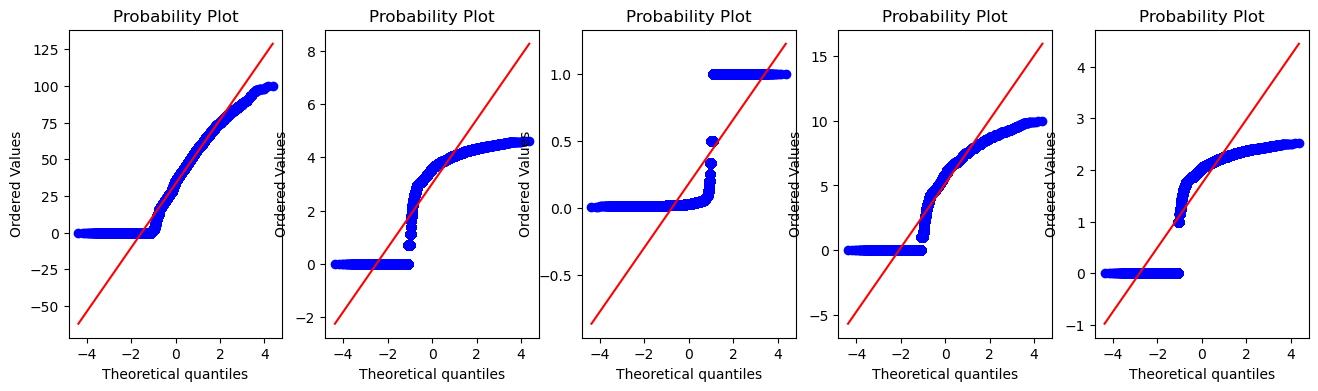

danceability original skewness: -0.4003991295600715
logarithmic: -0.7033043814280042
reciprocal:  1.0423257462450115
square-root: -1.078209424796711
exponential: -3.4689794311862756


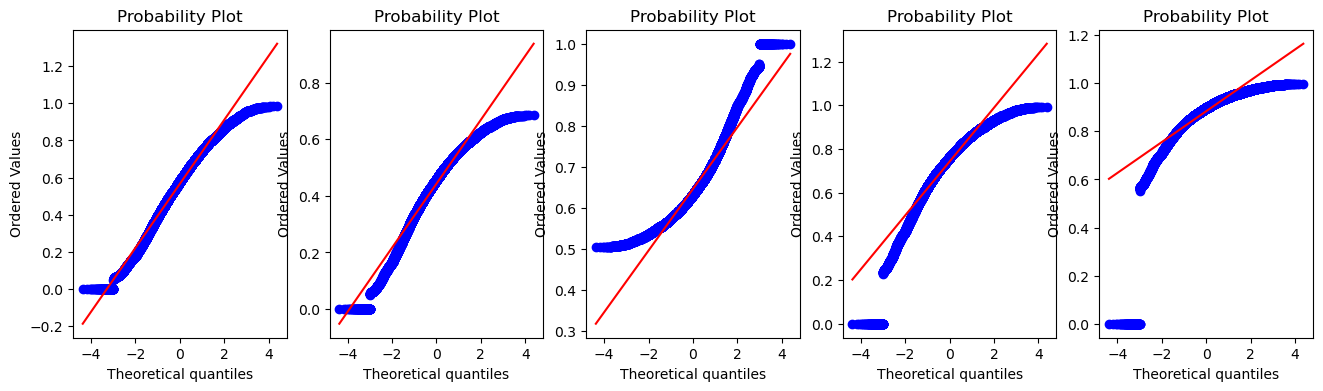

energy original skewness: -0.598542182428158
logarithmic: -0.8969101507400357
reciprocal:  1.2350332519840488
square-root: -1.2697363940462225
exponential: -2.2008891779513866


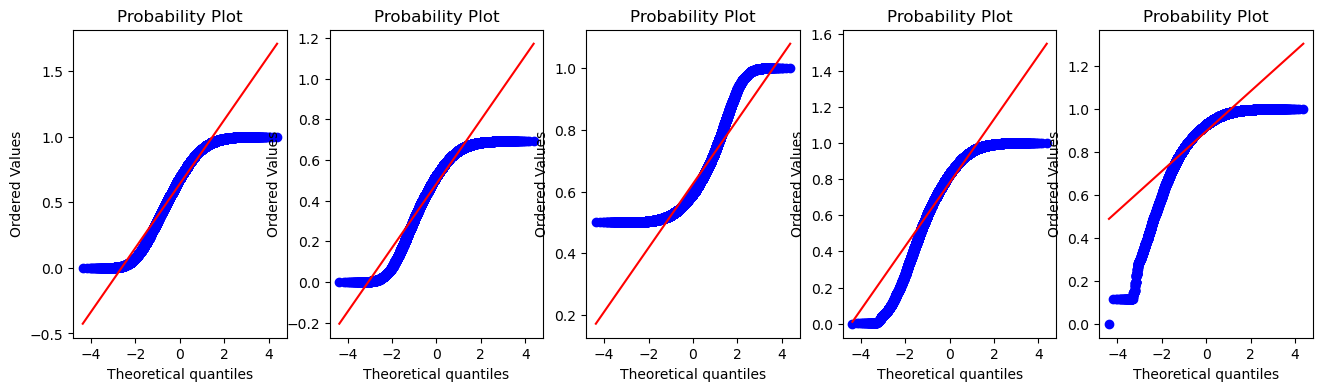

loudness original skewness: -2.0133133823721505
logarithmic: nan
reciprocal:  44.341700995068464
square-root: nan
exponential: nan


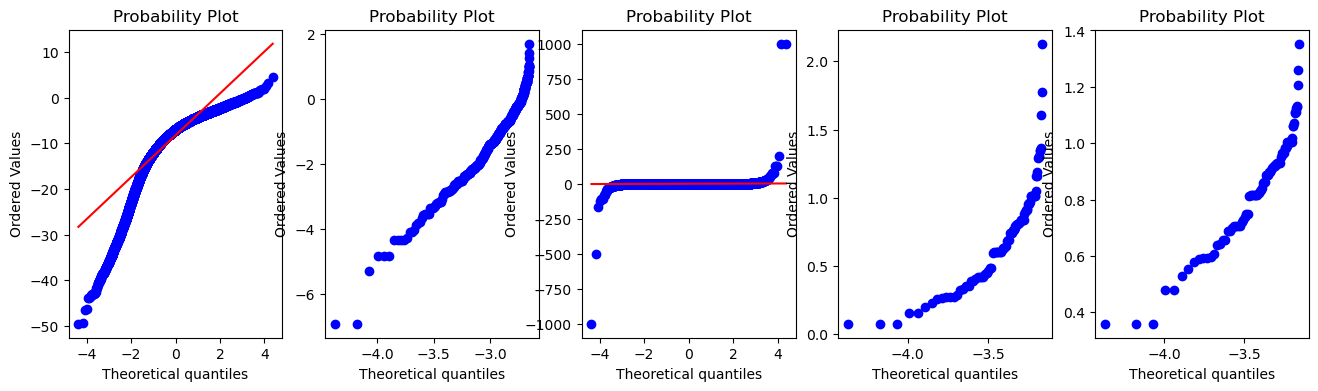

liveness original skewness: 2.1054497237799685
logarithmic: 1.7355487100916003
reciprocal:  -1.409425059871828
square-root: 1.3311332380750938
exponential: 0.8567637835174635


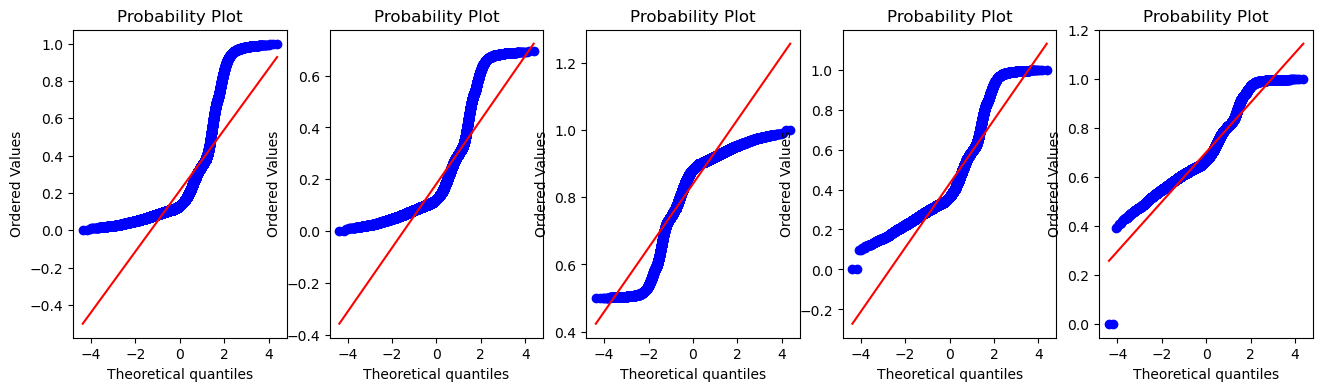

valence original skewness: 0.11477275798096229
logarithmic: -0.14268054744317982
reciprocal:  0.40566649459831094
square-root: -0.4685261380695686
exponential: -1.3963500280712502


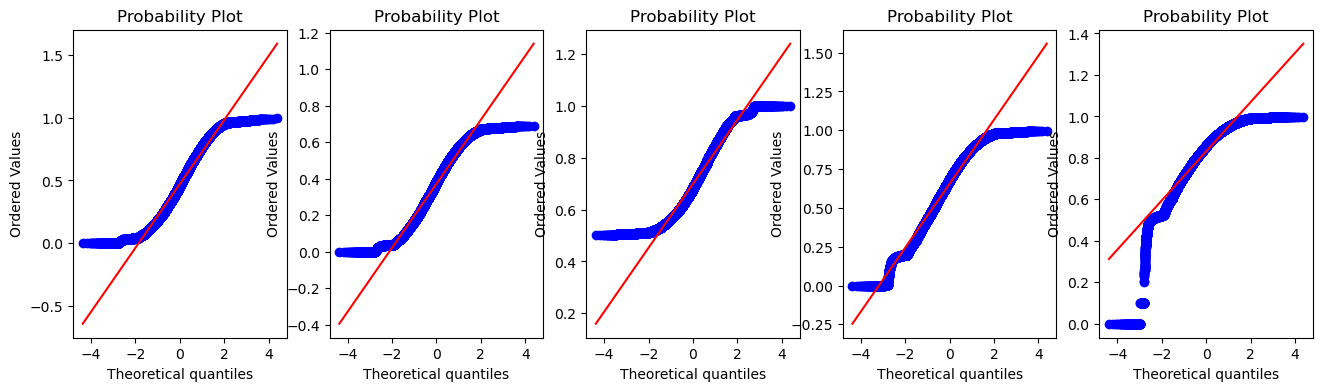

tempo original skewness: 0.23160111991386964
logarithmic: -5.502750438724598
reciprocal:  26.694049451308892
square-root: -0.5935911783686282
exponential: -5.885488448988585


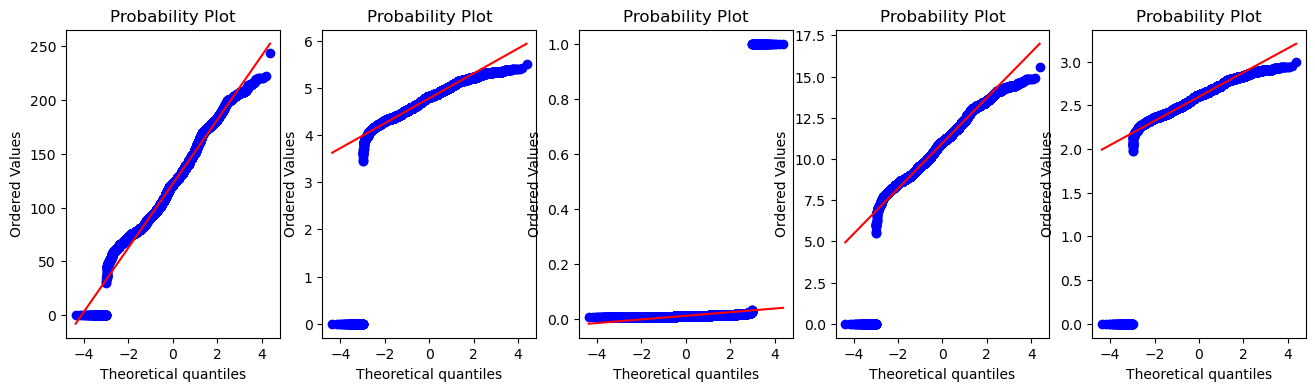

normalized_log_duration_ms original skewness: -0.31958068443272974
logarithmic: -0.638835280824704
reciprocal:  0.9703238227966375
square-root: -0.8717769408070013
exponential: -1.726462169685834


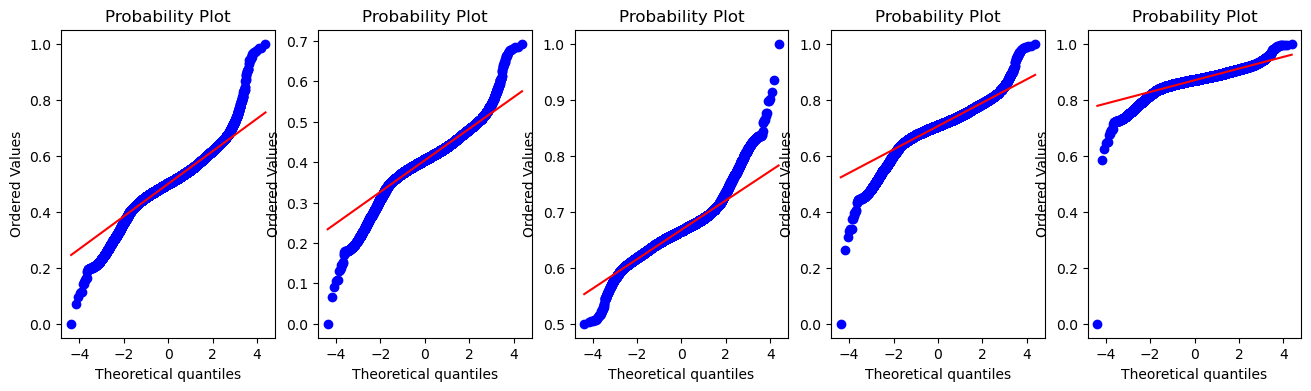

normalized_log_speechiness original skewness: 3.709426821614741
logarithmic: 2.974043285530332
reciprocal:  -2.4404269065864646
square-root: 2.144255893943368
exponential: 1.0116068748448879


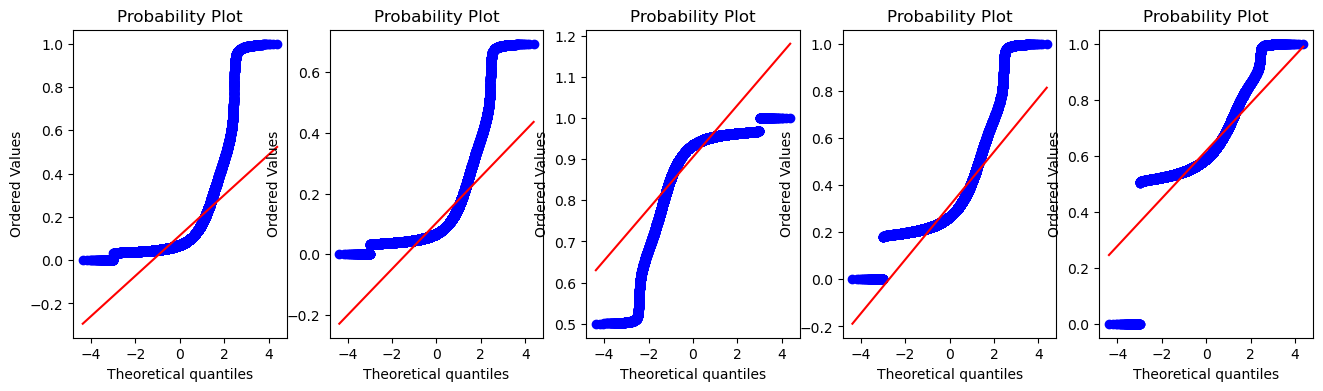

normalized_log_acousticness original skewness: 0.5532779927877299
logarithmic: 0.38423148504386045
reciprocal:  -0.22460380286975287
square-root: 0.045978184763428014
exponential: -0.5757332373153887


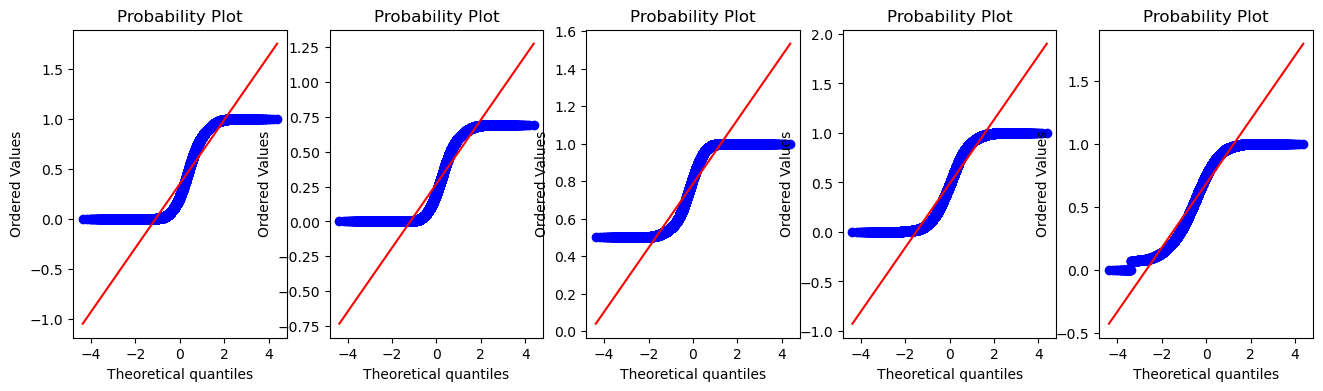

normalized_log_instrumentalness original skewness: 1.654754352771617
logarithmic: 1.5761566012497532
reciprocal:  -1.5030257919904042
square-root: 1.3793923500213747
exponential: 0.8759545392201098


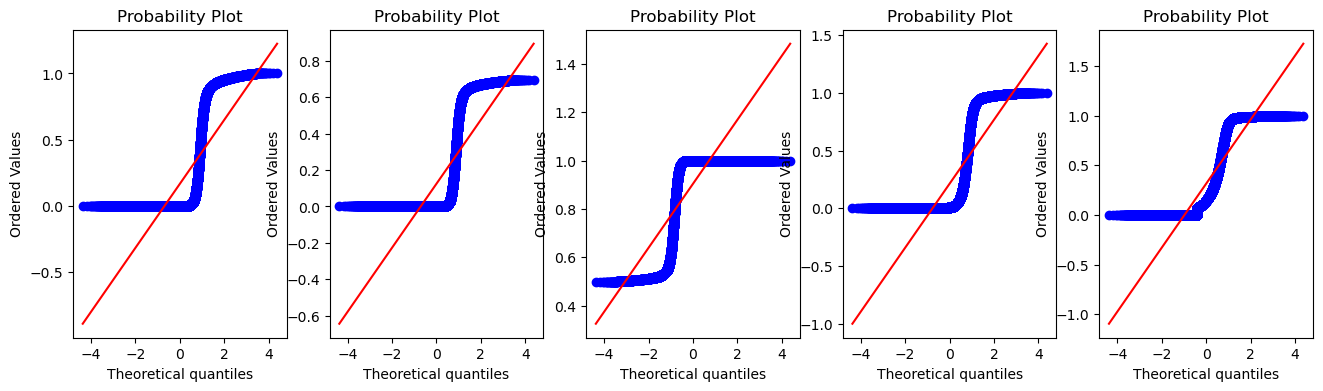

In [28]:
#Source: Duttab, Arnab. “Spotify Popularity Prediction Analysis & Modelling.” 
    #Kaggle, Kaggle, 29 Apr. 2023, www.kaggle.com/code/arnabdutta6/spotify-popularity-prediction-analysis-modelling.

for feature in feature_continuous_numerical:
    plt.figure(figsize=(16,4))
    plt.subplot(1,5,1)
    print(feature, 'original skewness:', skew(data[feature]))
    stats.probplot(data[feature], dist='norm', plot=plt)
          
    plt.subplot(1,5,2)
    print('logarithmic:', skew(dataset_log[feature]))
    stats.probplot(dataset_log[feature], dist='norm', plot=plt)
          
    plt.subplot(1,5,3)
    print('reciprocal: ', skew(dataset_reci[feature]))
    stats.probplot(dataset_reci[feature], dist='norm', plot=plt)
    
    plt.subplot(1,5,4)
    print('square-root:', skew(dataset_sqrt[feature]))
    stats.probplot(dataset_sqrt[feature], dist='norm', plot=plt)
    
    plt.subplot(1,5,5)
    print('exponential:', skew(dataset_expo[feature]))
    stats.probplot(dataset_expo[feature], dist='norm', plot=plt)
    
    plt.show()

The thin red line represents the ideal scenario where the dataset perfectly follows normal distribution. I imagine this line as a reference or guideline that tells us how the data points should ideally be distributed if they followed the theoretical distribution exactly. 

On the other hand, thick blue line represents the actual distribution of the dataset. Each point on this line corresponds to a specific value from the dataset, plotted against its expected value if it followed the theoretical distribution perfectly (as indicated by the thin red line). So when the two lines deviate, it implies that the dataset has different characteristics and tendencies compared to what Gaussian distribution describes.

None of the attempted methods effectively rectified the skewness observed in popularity, danceability, energy, valence, and tempo. Given that these attributes exhibited relatively balanced distributions initially, it seems impractical to pursue further transformations. However, it's worth noting that exponential and logarithmic transformations yielded promising results for duration_ms.

The challenge intensifies with loudness due to its inclusion of negative values, rendering both exponential and logarithmic transformations ineffective. Additionally, reciprocal transformations failed to mitigate the skewness in this feature. On the other hand, exponential transformations proved beneficial for addressing skewness in speechiness, instrumentalness, and liveness.

Interestingly, the acousticness feature responded favorably to square-root transformations. Therefore, we'll employ this approach for acousticness, while applying exponential transformations to speechiness, instrumentalness, liveness, and duration_ms. Only tempo has an skewness score close to 0, so we won't apply any transformation to it.

In [29]:
data['normalized_log_acousticness']=data['normalized_log_acousticness']**(1/2)
data[['normalized_log_speechiness','normalized_log_instrumentalness','liveness','normalized_log_duration_ms']]=data[['normalized_log_speechiness','normalized_log_instrumentalness','liveness','normalized_log_duration_ms']]**(1/5)
data.head()

,popularity,explicit,danceability,energy,key,loudness,mode,liveness,valence,tempo,time_signature,normalized_log_duration_ms,normalized_log_speechiness,normalized_log_acousticness,normalized_log_instrumentalness
0,73,False,0.676,0.4610,1,-6.746,0,0.814285,0.715,87.917,4,0.875068,0.723226,0.214138,0.068030
1,55,False,0.420,0.1660,1,-17.235,1,0.632214,0.267,77.489,4,0.850726,0.641753,0.973059,0.095686
2,57,False,0.438,0.3590,0,-9.734,1,0.651084,0.120,76.332,4,0.870232,0.603785,0.525170,0.000000
3,71,False,0.266,0.0596,0,-18.515,1,0.666983,0.143,181.740,3,0.867876,0.555270,0.965652,0.159117
4,82,False,0.618,0.4430,2,-9.681,1,0.607730,0.167,119.949,4,0.867029,0.597086,0.745950,0.000000


### Feature Scaling and Selection

Now, I want to focus on preprocessing steps to prepare the dataset for modeling. By using feature scaling, I want to ensure that features are on a similar scale, preventing certain features from dominating others during model training.

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features_scaling=[feature for feature in feature_numerical if feature not in ['popularity','mode']]
scaler.fit(data[features_scaling])

StandardScaler()

In [31]:
scaler.transform(data[features_scaling])

array([[-0.30593202,  0.62839367, -0.72132759, ...,  1.14094656,
        -0.80608487, -0.678494  ],
       [-0.30593202, -0.84789057, -1.89638213, ...,  0.26194502,
         1.43358163, -0.60254555],
       [-0.30593202, -0.74408933, -1.12761763, ..., -0.14768934,
         0.11180863, -0.86531308],
       ...,
       [-0.30593202,  0.35735711, -1.2471147 , ..., -0.49719193,
         1.36682261, -0.86531308],
       [-0.30593202,  0.11515423, -0.54208198, ..., -0.9030891 ,
         0.57882165, -0.86531308],
       [-0.30593202, -0.23661663, -0.61776346, ...,  0.19401604,
         1.12025101, -0.86531308]])

In [32]:
data_to_replace=pd.DataFrame(scaler.transform(data[features_scaling]), columns=features_scaling)
data_to_replace.head()

,explicit,danceability,energy,key,loudness,liveness,valence,tempo,time_signature,normalized_log_duration_ms,normalized_log_speechiness,normalized_log_acousticness,normalized_log_instrumentalness
0,-0.305932,0.628394,-0.721328,-1.210476,0.298800,1.078285,0.928984,-1.142994,0.221660,0.255475,1.140947,-0.806085,-0.678494
1,-0.305932,-0.847891,-1.896382,-1.210476,-1.794228,-0.653979,-0.799395,-1.490909,0.221660,-0.860318,0.261945,1.433582,-0.602546
2,-0.305932,-0.744089,-1.127618,-1.491364,-0.297440,-0.474446,-1.366520,-1.529510,0.221660,0.033788,-0.147689,0.111809,-0.865313
3,-0.305932,-1.735968,-2.320198,-1.491364,-2.049645,-0.323181,-1.277786,1.987275,-2.092538,-0.074213,-0.671114,1.411724,-0.428357
4,-0.305932,0.293923,-0.793026,-0.929587,-0.286864,-0.886924,-1.185194,-0.074292,0.221660,-0.113015,-0.219959,0.763357,-0.865313


In [33]:
for feature in features_scaling:
    data[feature]=data_to_replace[feature].values

In [34]:
data.head()

,popularity,explicit,danceability,energy,key,loudness,mode,liveness,valence,tempo,time_signature,normalized_log_duration_ms,normalized_log_speechiness,normalized_log_acousticness,normalized_log_instrumentalness
0,73,-0.305932,0.628394,-0.721328,-1.210476,0.298800,0,1.078285,0.928984,-1.142994,0.221660,0.255475,1.140947,-0.806085,-0.678494
1,55,-0.305932,-0.847891,-1.896382,-1.210476,-1.794228,1,-0.653979,-0.799395,-1.490909,0.221660,-0.860318,0.261945,1.433582,-0.602546
2,57,-0.305932,-0.744089,-1.127618,-1.491364,-0.297440,1,-0.474446,-1.366520,-1.529510,0.221660,0.033788,-0.147689,0.111809,-0.865313
3,71,-0.305932,-1.735968,-2.320198,-1.491364,-2.049645,1,-0.323181,-1.277786,1.987275,-2.092538,-0.074213,-0.671114,1.411724,-0.428357
4,82,-0.305932,0.293923,-0.793026,-0.929587,-0.286864,1,-0.886924,-1.185194,-0.074292,0.221660,-0.113015,-0.219959,0.763357,-0.865313


All audio features have been scaled and replaced. I can begin splitting the data into training and testing sets for machine learning modelling. I'll use 30% of the dataset for testing, and 70% for training.

In [35]:
# Seperating independant variables from the target variable (popularity)
x=data.drop(['popularity'], axis=1)
y=data['popularity']

In [36]:
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=7)

In [37]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(79484, 14) (34065, 14)
(79484,) (34065,)


In [38]:
def correlation(dataset, threshold):
    """
    Identify highly correlated features in a dataset based on a given threshold.

    Parameters:
    - dataset (DataFrame): The dataset containing features for correlation analysis.
    - threshold (float): The threshold value for correlation. Features with absolute correlation
                         values greater than this threshold are considered highly correlated.

    Returns:
    - correlated_columns (set): A set containing the names of highly correlated columns.
    """
    # Initialize an empty set to store correlated column names
    correlated_columns = set()
    
    # Compute the correlation matrix for the dataset
    correlation_matrix = dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            # Check if the absolute correlation value is greater than the threshold
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                # If so, add the column name to the set of correlated columns
                colname = correlation_matrix.columns[i]
                correlated_columns.add(colname)
                
    return correlated_columns


# Find correlated features in the training dataset with a threshold of 0.7
corr_features = correlation(X_train, 0.7)
# Print the number of correlated features and their names
print(len(set(corr_features)))
print(corr_features)


2
{'normalized_log_acousticness', 'loudness'}


In [39]:
X_train_corr=X_train.copy()
X_test_corr=X_test.copy()

In [40]:
print(X_train_corr.shape, X_test_corr.shape)

(79484, 14) (34065, 14)


### Model Training

In [41]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [42]:
linear_reg = sklearn.linear_model.LinearRegression()
lasso = sklearn.linear_model.Lasso()
ridge = sklearn.linear_model.Ridge()
dtree = DecisionTreeRegressor()
bayesian = BayesianRidge()
xgbreg=XGBRegressor()
xgbrfreg=XGBRFRegressor()

To train and compare these models, I need a function that takes a machine learning model object as input and fits the model to the training data (X_train_corr and y_train). Then, it should use the trained model to make predictions on the test data (X_test_corr). After making predictions, it'll calculate the residuals by subtracting the predicted values from the actual target values (y_test).

Next, it'll creates a matplotlib figure with two subplots. In the first subplot (left), it should create a scatter plot of the actual target values (y_test) against the predicted values. In the second subplot (right), it should create a distribution plot (deprecated in seaborn) of the residuals, showing the distribution of errors between the actual and predicted values.

Finally, it should display the figure containing both subplots. This function will be useful for visualizing the performance of different machine learning models in terms of their predictions and the distribution of their prediction errors.

In [43]:
#Source: Duttab, Arnab. “Spotify Popularity Prediction Analysis & Modelling.” 
    #Kaggle, Kaggle, 29 Apr. 2023, www.kaggle.com/code/arnabdutta6/spotify-popularity-prediction-analysis-modelling.


def model(name):
    """
    Fit a machine learning model, make predictions, and visualize the results.

    Parameters:
    - name (estimator): The machine learning model to be trained and evaluated.

    Returns:
    - None
    """
    # Fit the model to the training data
    name.fit(X_train_corr, y_train)
    
    # Make predictions on the test data
    prediction = name.predict(X_test_corr)
    
    # Calculate residuals
    residual = y_test - prediction
    
    # Visualize the results
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, prediction)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted')
    
    plt.subplot(1, 2, 2)
    sns.histplot(residual, kde=True, bins=30)
    plt.xlabel('Residual')
    plt.ylabel('Density')
    plt.title('Residual Distribution')
    plt.xlim(-80, 80)  
    
    plt.tight_layout()
    plt.show()


Histplot is a seaborn plot that is going to be discontinued soon, and I don't want the warning label to take focus away from the plots.

In [44]:
import warnings
warnings.filterwarnings("ignore")

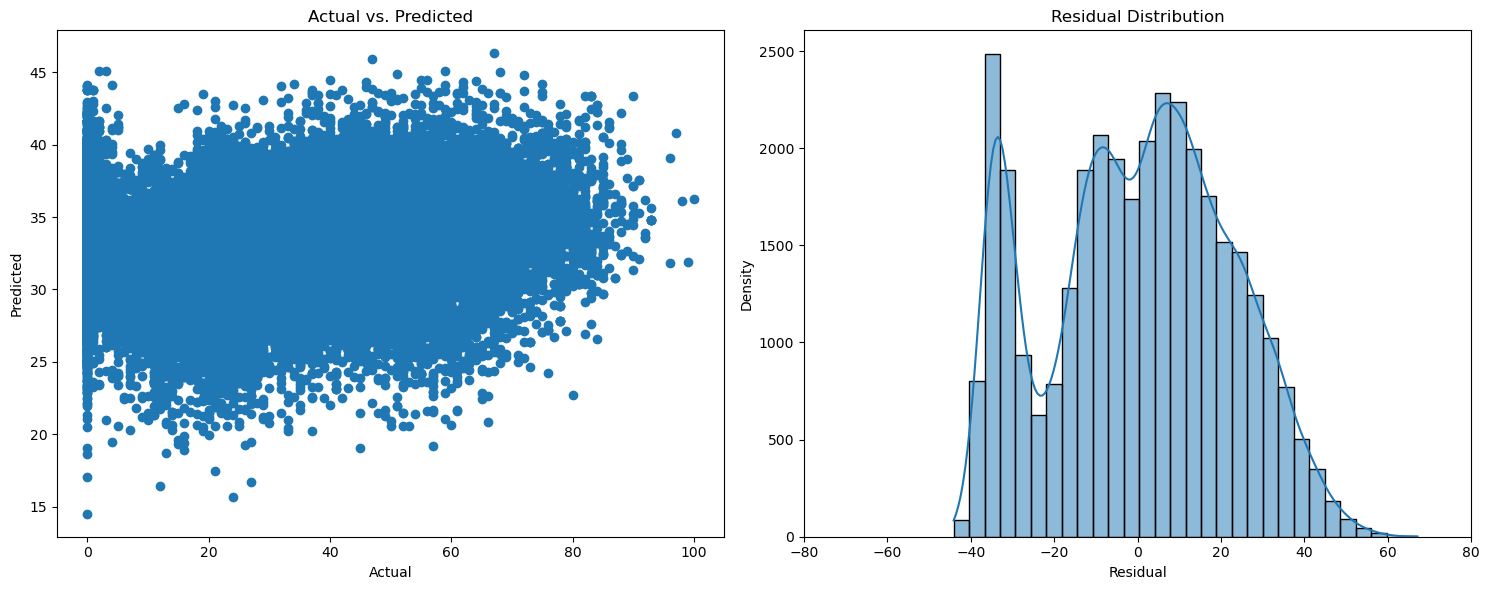

In [45]:
model(linear_reg)

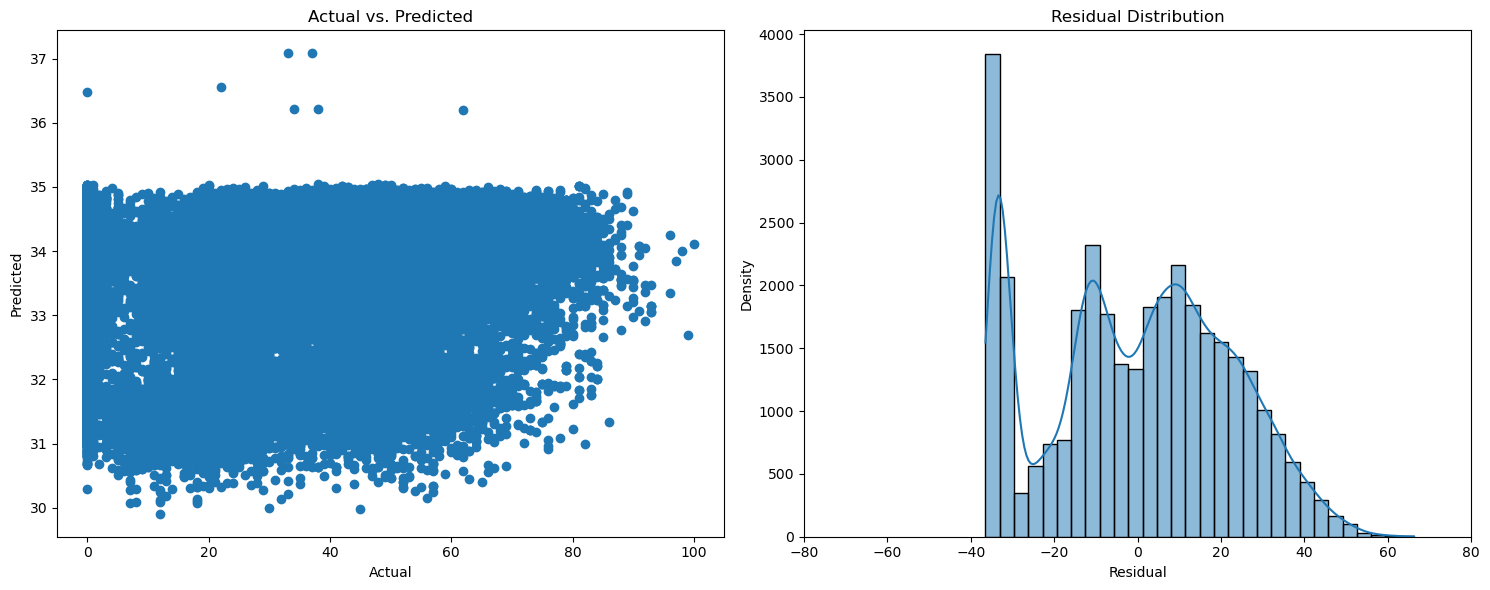

In [46]:
model(lasso)

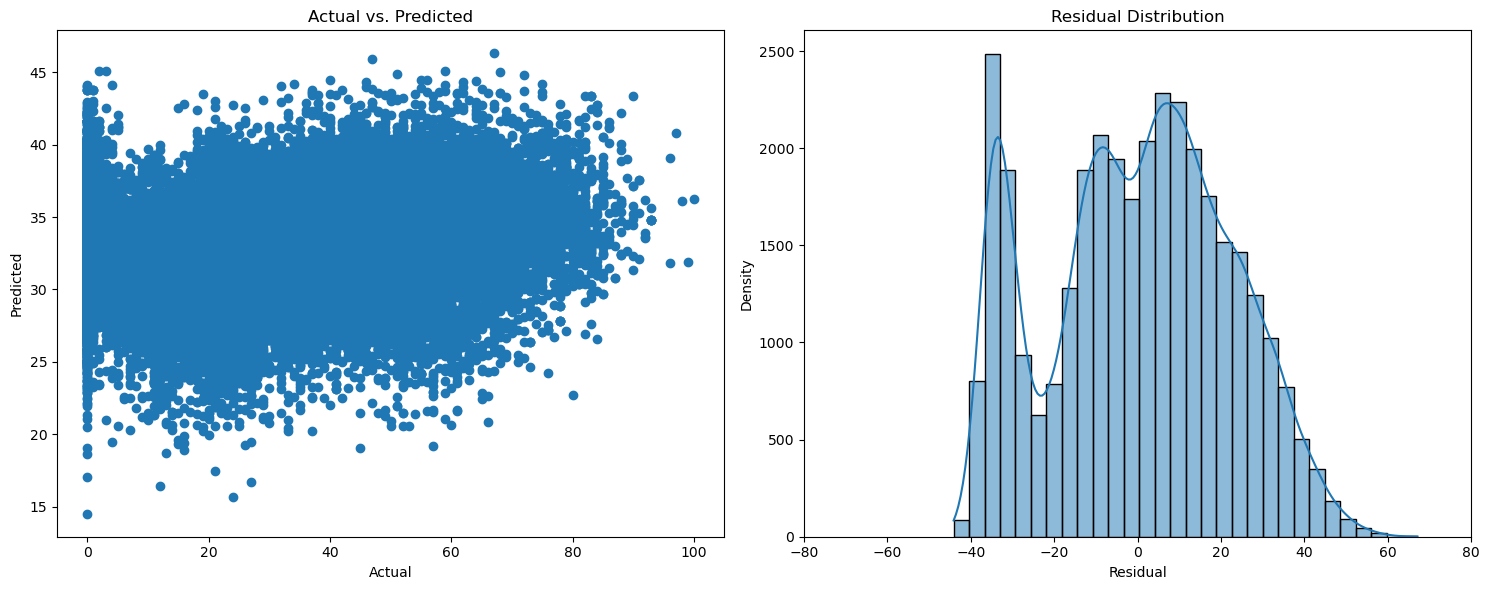

In [47]:
model(ridge)

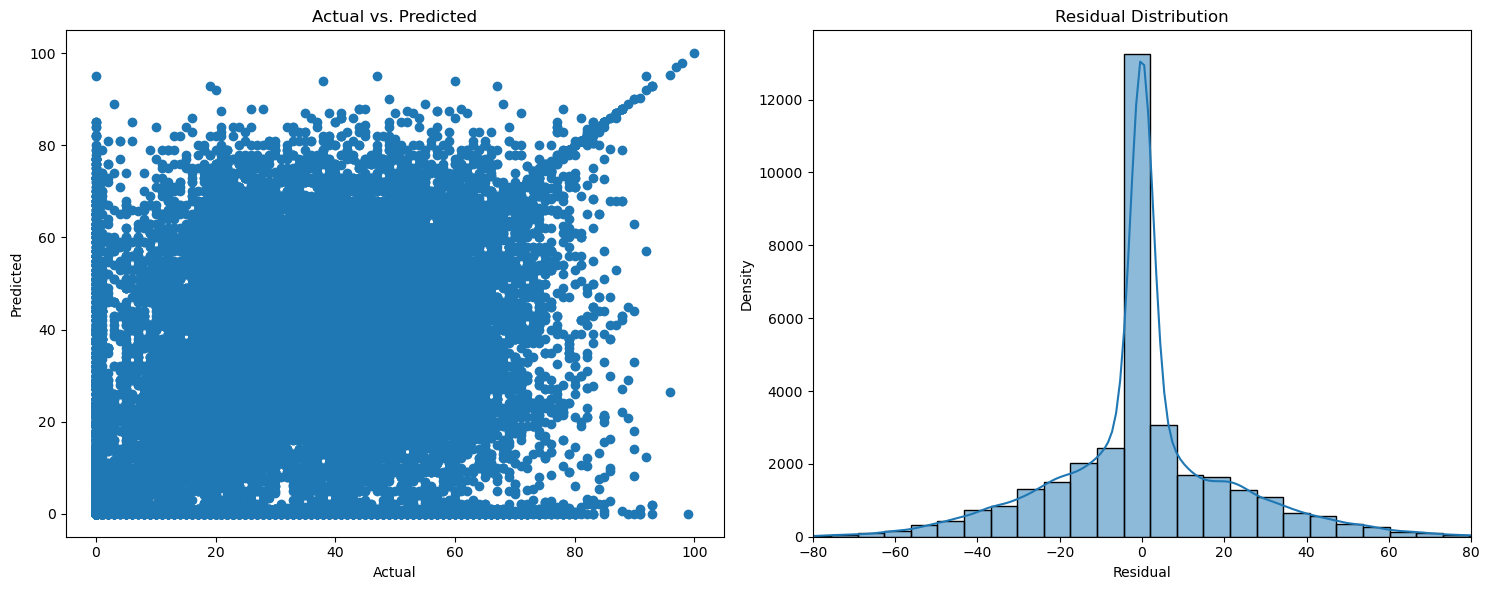

In [48]:
model(dtree)

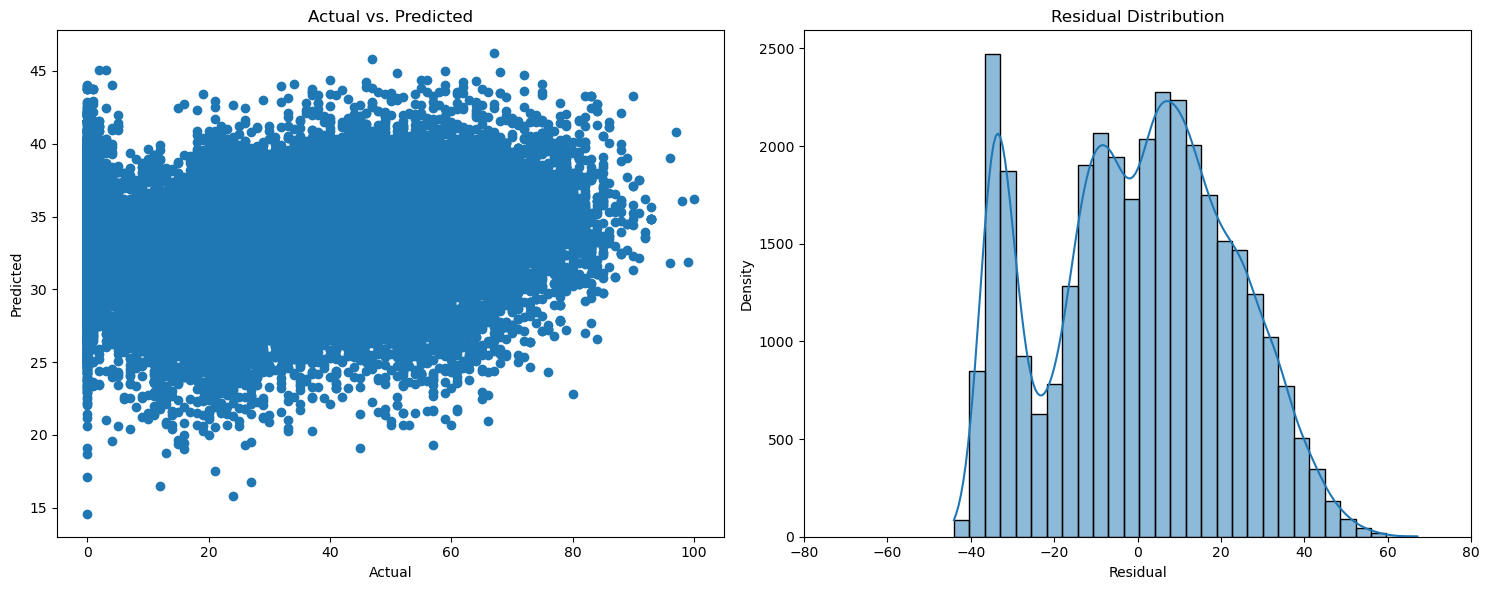

In [49]:
model(bayesian)

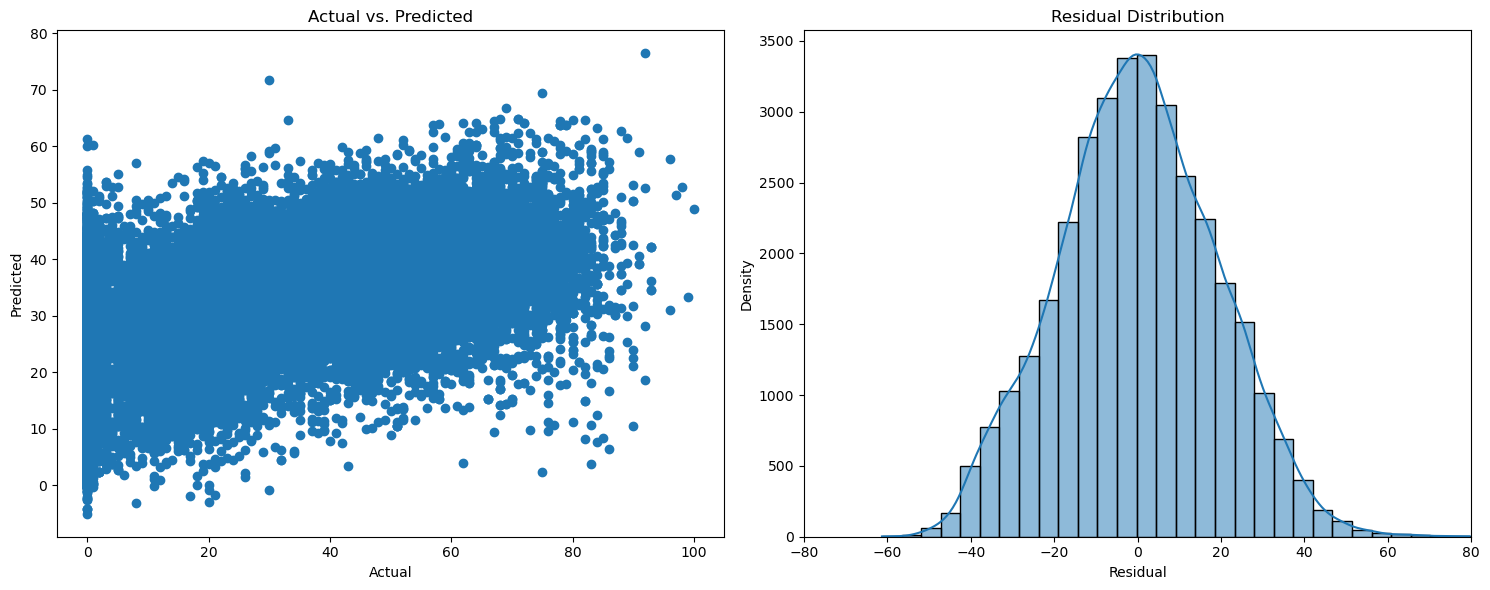

In [50]:
model(xgbreg)

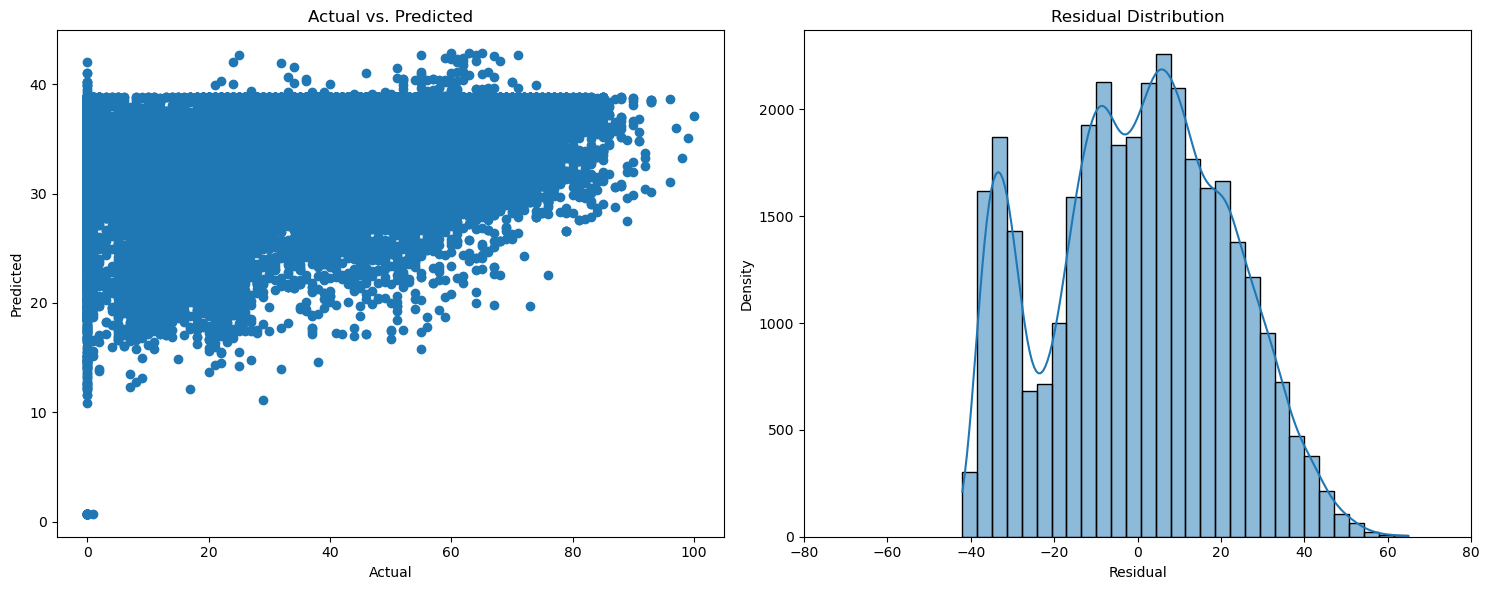

In [51]:
model(xgbrfreg) 

The ideal model's residual distribution plot must be akin to normal distribution, so we can ignore all models whose plots which take any other irregular shape. We're left with two models: the XGBoost Regressor and the Decision Tree. They take a similar shape, but the decision tree's residual distribution curve has a massive spike in the middle, whereas the XGBoost model's curve doesn't seems to have a mosre consistent rise and fall. What matters is that both models' curves resemble normal distribution, so we have two options. Therefore, both models must be compared to test which one is better at predicting values.

### Model Comparision and Evaluation

In [52]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """
    Fit a model to the training data, make predictions on the test data, and evaluate the model's performance.

    Parameters:
    - model (estimator): The machine learning model to be trained and evaluated.
    - X_train (array-like): The feature matrix of the training dataset.
    - y_train (array-like): The target values of the training dataset.
    - X_test (array-like): The feature matrix of the test dataset.
    - y_test (array-like): The target values of the test dataset.
    - model_name (str): The name of the model for display purposes.

    Returns:
    - None
    """
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate R-squared
    r_squared = r2_score(y_test, y_pred)
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    # Print evaluation metrics
    print(f"{model_name} - R-squared: {r_squared:.4f}")
    print(f"{model_name} - MSE: {mse:.4f}")
    
    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='skyblue', alpha=0.7, edgecolors='w', s=80)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='salmon', lw=2, linestyle='--')
    plt.xlabel('Actual Popularity', fontsize=14)
    plt.ylabel('Predicted Popularity', fontsize=14)
    plt.title(f'Actual vs. Predicted - {model_name}', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


XGBoost - R-squared: 0.2677
XGBoost - MSE: 361.6112


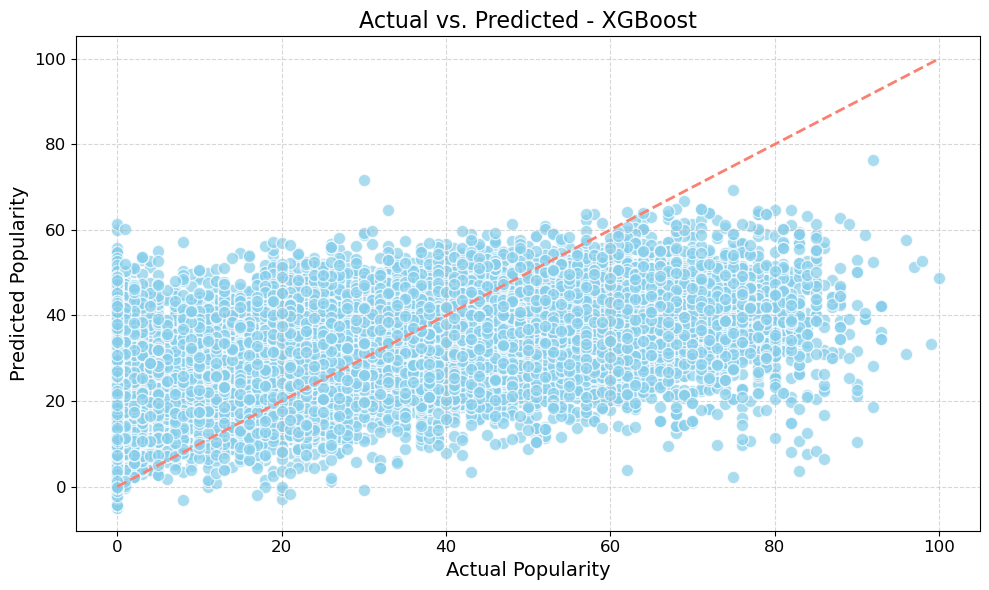

Decision Trees - R-squared: 0.0882
Decision Trees - MSE: 450.2518


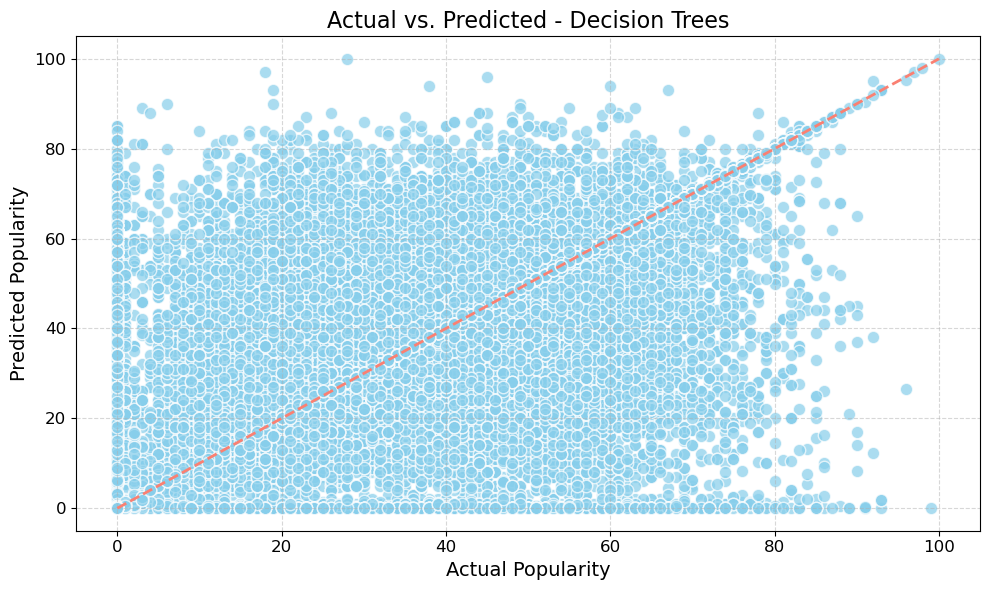

In [53]:
# Evaluate XGBoost Regressor
evaluate_model(xgbreg, X_train_corr, y_train, X_test_corr, y_test, 'XGBoost')

# Evaluate Decision Tree Regressor
evaluate_model(dtree, X_train_corr, y_train, X_test_corr, y_test, 'Decision Trees')

We have a clear winner: XGBoost! It's r-squared value (0.266) is the highest out of the two and it's MSE score (361.6112) the lowest. 

Now, we can finally quantify and visualize how each variables influence popularity, as well as use the model to generate predicts.

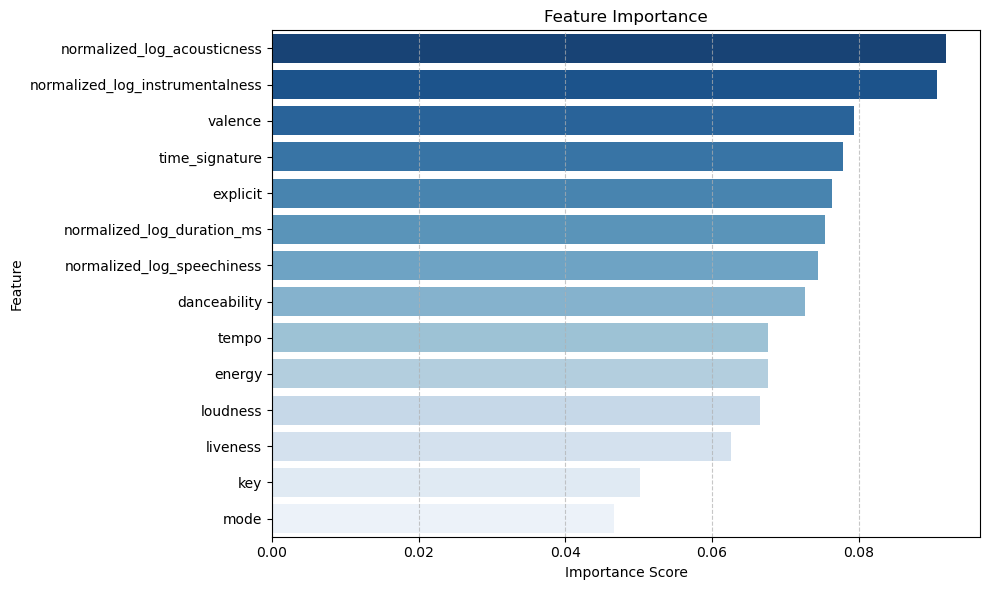

In [54]:
def plot_feature_importance(model, feature_names):
    # Get feature importance scores
    importance_scores = model.feature_importances_
    
    # Create a data frame to store feature names and their importance scores
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})
    
    # Sort the data frame by importance scores in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    palette = sns.color_palette("Blues_r", len(feature_importance_df))
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette=palette)
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.grid(axis='x', linestyle='--', alpha=0.7)  
    plt.tight_layout()  
    plt.show()

plot_feature_importance(xgbreg, X_train_corr.columns)

After training, this model can predict popularity from data it hasn't seen before.

In [55]:
xgbreg.fit(X_train_corr, y_train)

unseen_data_dict = {
    'explicit': [0, 1],
    'danceability': [0.8, 0.5],
    'energy': [0.6, 0.4],
    'key': [2, 7],
    'loudness': [-6, -10],
    'mode': [1, 0],
    'liveness': [0.3, 0.7],
    'valence': [0.7, 0.4],
    'tempo': [120, 90],
    'time_signature': [4, 3],
    'normalized_log_duration_ms': [0.8, 0.5],
    'normalized_log_speechiness': [0.2, 0.5],
    'normalized_log_acousticness': [0.1, 0.8],
    'normalized_log_instrumentalness': [0.05, 0.9]
}

unseen_data = pd.DataFrame(unseen_data_dict)
print("Unseen Data: ")
print(unseen_data)
print()
prediction = xgbreg.predict(unseen_data)
print(f"Predicted popularity for first song in unseen dataset: {prediction[0]}")
print(f"Predicted popularity for second song in unseen dataset: {prediction[1]}")

Unseen Data: 
   explicit  danceability  energy  key  loudness  mode  liveness  valence  \
0         0           0.8     0.6    2        -6     1       0.3      0.7   
1         1           0.5     0.4    7       -10     0       0.7      0.4   

   tempo  time_signature  normalized_log_duration_ms  \
0    120               4                         0.8   
1     90               3                         0.5   

   normalized_log_speechiness  normalized_log_acousticness  \
0                         0.2                          0.1   
1                         0.5                          0.8   

   normalized_log_instrumentalness  
0                             0.05  
1                             0.90  

Predicted popularity for first song in unseen dataset: 43.147743225097656
Predicted popularity for second song in unseen dataset: 45.86911392211914


## Discussion and Conclusion

The XGBRegressor model yeilds a MSE value of 361.6112. This result suggests that - on average - the XGBoost model's predictions deviate from the true popularity values by approximately 19 units (since the square root of 361 is 19). Therefore, while the model may not perfectly predict the popularity of each song, its predictions are reasonably close to the actual values, indicating a moderate level of accuracy. The exclusion of categorical non-numerical variables (namely track_genre and track_artist) significantly reduces the extent to which the XGBRregressor model can accurately predict a song's popularity, but it still produces a decent estimate of commercial success. 

The R-squared value of 0.2677 indicates the proportion of variance in the target variable (popularity) that is explained by the independent variables (features) in the XGBoost model. The metric suggests that approximately 26.77% of the variability in song popularity can be explained by the features included in the model. While this indicates a moderate level of explanatory power, it also implies that there are several other factors not captured by the model that contribute to the variability in song popularity. While the model provides some insights into predicting popularity, there are still significant aspects influencing popularity that are not accounted for by audio features, or even variables that aren't even present in our dataset. These unknown variables could be an artits' number monthly listeners, a metric for an artist's social media presence, the number of playlists a song is added to, etc. Luck also plays a huge understated role in a song's popularity, and I don't think any machine learning models are currently capable of acknowledging and processing this factor. 

The 3 most significant influences on the model's prediction (and therefore the song's estimated popularity) are acousticness, instrumentalness, and valence. With an importance score of nearly 0.09, acousticness has the highest influence on the model's prediction. Acousticness refers to the degree of acoustic characteristics present in a song, with higher values indicating a more acoustic sound. The high importance score suggests that songs with distinct acoustic characteristics significantly impact their popularity, as identified by the model. Similarly, instrumentalness, with an importance score of around 0.09, is another highly influential parameter. Instrumentalness measures the likelihood of a track containing no vocals, and higher values indicate a higher probability of the track being instrumental. This feature's high importance score suggests that instrumental tracks or those with minimal vocal content have a notable effect on their popularity. Valence, with an importance score of almost 0.08, is the third most significant feature in predicting song popularity. Valence represents the musical positiveness conveyed by a track, with higher values indicating more positive or cheerful-sounding tracks. The model assigns considerable importance to valence, indicating that the emotional tone or positivity of a song plays a crucial role in determining its popularity.

### References

Duttab, Arnab. “Spotify Popularity Prediction Analysis & Modelling.” Kaggle, Kaggle, 29 Apr. 2023, www.kaggle.com/code/arnabdutta6/spotify-popularity-prediction-analysis-modelling. 

XGBoost. (n.d.). XGBoost parameters. XGBoost Parameters - xgboost 2.0.3 documentation. https://xgboost.readthedocs.io/en/stable/parameter.html 

ChatGPT (used for debugging and adding color to plots).